In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos 
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Cargar los datos (usando la ruta correcta)
file_path = '../data/processed/merged_clean.csv'
df = pd.read_csv(file_path)

 # Mostar las primeras filas del DataFrame
print(df.head())

         Flower     Color  Stems  Year  Month  Day
0  Alstroemeria  Assorted    372  2021      3   21
1  Alstroemeria  Assorted    480  2021      6    9
2  Alstroemeria  Assorted    120  2022      8    3
3  Alstroemeria  Assorted     50  2022     12   30
4  Alstroemeria  Assorted    550  2023      3   30


El DataFrame no contiene la columna 'Date'. Por favor, verifica tus datos.


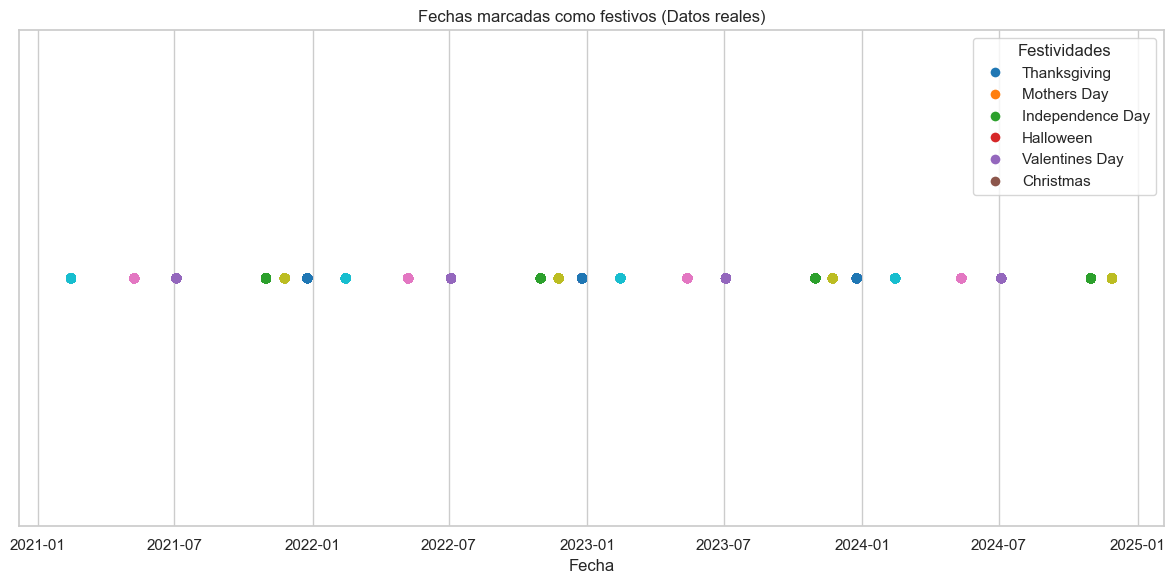

{'christmas': [Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('20

In [2]:
# Mostrar los días exactos de cada festividad en consola y mejorar visualmente la gráfica
# Verificar si 'df' existe y tiene la columna 'Date'
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Verificar si df existe
if 'df' not in globals():
    # Si no existe df, creamos un dataframe de ejemplo con rango de fechas
    start_date = '2019-01-01'
    end_date = '2022-12-31'
    df = pd.DataFrame({'Date': pd.date_range(start=start_date, end=end_date)})

# Asegurarse que 'Date' es de tipo datetime
if 'Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])
elif 'Date' not in df.columns:
    print("El DataFrame no contiene la columna 'Date'. Por favor, verifica tus datos.")
    # Intentar crear una columna Date si hay otras columnas de fecha disponibles
    if all(col in df.columns for col in ['Year', 'Month', 'Day']):
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    else:
        raise KeyError("No se puede crear la columna 'Date'. Faltan columnas de año, mes o día.")

# Extraer año, mes y día si no están presentes
if 'Year' not in df.columns:
    df['Year'] = df['Date'].dt.year
if 'Month' not in df.columns:
    df['Month'] = df['Date'].dt.month
if 'Day' not in df.columns:
    df['Day'] = df['Date'].dt.day

# Verificar si marked_dates existe ya, si no, crear aplicando add_holiday_markers
if 'marked_dates' not in globals():
    # Función para marcar las festividades (usando la función que está en la celda siguiente)
    def add_holiday_markers(df):
        df_with_holidays = df.copy()
        holidays = ['valentines_day', 'mothers_day', 'independence_day', 'halloween', 'thanksgiving', 'christmas']
        for holiday in holidays:
            df_with_holidays[holiday] = False
        
        def get_mothers_day(year):
            first = datetime(year, 5, 1)
            first_sunday = first + timedelta(days=(6 - first.weekday()) % 7)
            return first_sunday + timedelta(days=7)
        
        def get_thanksgiving(year):
            first = datetime(year, 11, 1)
            first_thursday = first + timedelta(days=(3 - first.weekday()) % 7)
            return first_thursday + timedelta(days=21)
        
        years = df_with_holidays['Year'].unique()
        
        for year in years:
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 2) & 
                                (df_with_holidays['Day'] == 14), 'valentines_day'] = True
            
            mothers_day = get_mothers_day(year)
            df_with_holidays.loc[(df_with_holidays['Date'] == mothers_day), 'mothers_day'] = True
            
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 7) & 
                                (df_with_holidays['Day'] == 4), 'independence_day'] = True
            
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 10) & 
                                (df_with_holidays['Day'] == 31), 'halloween'] = True
            
            thanksgiving = get_thanksgiving(year)
            df_with_holidays.loc[(df_with_holidays['Date'] == thanksgiving), 'thanksgiving'] = True
            
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 12) & 
                                (df_with_holidays['Day'] == 25), 'christmas'] = True
        
        return df_with_holidays

    # Aplicar las marcas de festividades
    df_holidays = add_holiday_markers(df)
    
    # Crear un DataFrame con las fechas y sus nombres de festividades
    marked_dates = df_holidays[df_holidays[['valentines_day', 'mothers_day', 'independence_day', 
                                           'halloween', 'thanksgiving', 'christmas']].any(axis=1)].copy()
    
    def get_holiday_name(row):
        for col in ['valentines_day', 'mothers_day', 'independence_day', 'halloween', 'thanksgiving', 'christmas']:
            if row[col]:
                return col
        return None
    
    marked_dates['holiday'] = marked_dates.apply(get_holiday_name, axis=1)

# Mostrar días exactos
marked_dates_sorted = marked_dates[['holiday', 'Date']].sort_values('Date')
holiday_dates_by_name = marked_dates_sorted.groupby('holiday')['Date'].apply(list).to_dict()

# Visualización mejorada con etiquetas
plt.figure(figsize=(12, 6))
scatter = plt.scatter(marked_dates['Date'], [1]*len(marked_dates), 
                      c=marked_dates['holiday'].astype('category').cat.codes, 
                      cmap='tab10')

plt.yticks([])
plt.title("Fechas marcadas como festivos (Datos reales)")
plt.xlabel("Fecha")
plt.grid(True, axis='x')

# Crear leyenda con colores asignados
unique_holidays = marked_dates['holiday'].unique()
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=holiday.replace('_', ' ').title(), 
               markerfacecolor=plt.cm.tab10(i), markersize=8)
    for i, holiday in enumerate(unique_holidays)
]
plt.legend(handles=legend_elements, title="Festividades")

plt.tight_layout()
plt.show()

# Mostrar por consola los días exactos de cada festividad
holiday_dates_by_name


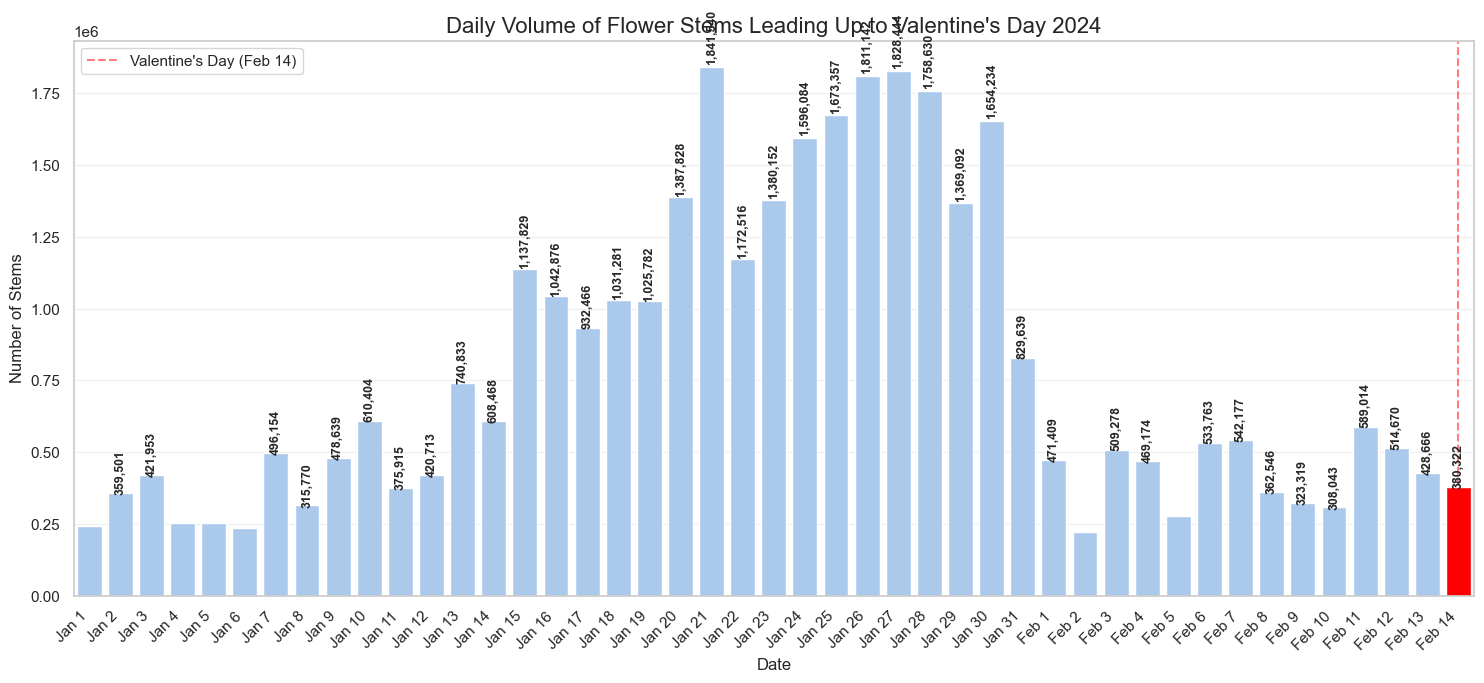

In [ ]:
# Filter data for the period from January 1, 2024 to February 14, 2024
valentine_period_2024 = df[(df['Year'] == 2024) & 
                          (((df['Month'] == 1)) | 
                           ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Group by date and sum the Stems
daily_stems_valentine = valentine_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_valentine['date'] = pd.to_datetime('2024-' + 
                                           daily_stems_valentine['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine['Day'].astype(str).str.zfill(2))
daily_stems_valentine = daily_stems_valentine.sort_values('date')

# Plot the daily volume of stems during the Valentine's period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_valentine)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_valentine['date']]
plt.xticks(range(len(daily_stems_valentine)), date_labels, rotation=45, ha='right')

# Highlight Valentine's Day
valentine_idx = daily_stems_valentine[
    (daily_stems_valentine['Month'] == 2) & 
    (daily_stems_valentine['Day'] == 14)
].index

if not valentine_idx.empty:
    valentine_idx = valentine_idx[0]
    ax.patches[valentine_idx].set_facecolor('red')

# Add text labels for peaks
for i, v in enumerate(daily_stems_valentine['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Valentine\'s Day 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Valentine's Day
if isinstance(valentine_idx, (int, np.integer)):
    plt.axvline(x=valentine_idx, color='red', linestyle='--', alpha=0.5, label="Valentine's Day (Feb 14)")

plt.legend()
plt.tight_layout()
plt.show()

Columns available: ['Flower', 'Color', 'Stems', 'Year', 'Month', 'Day', 'Date']


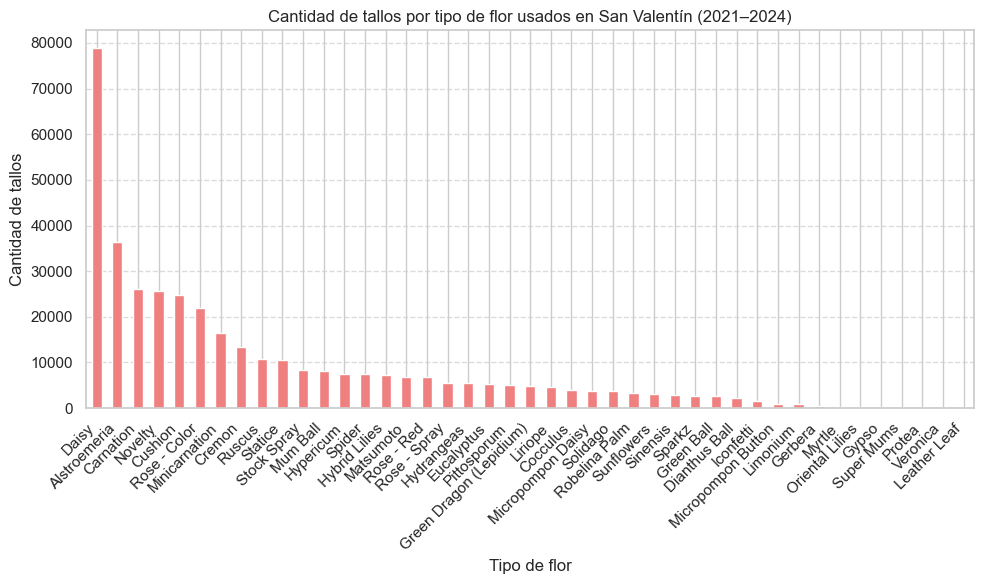

In [6]:
# Analizar los datos de San Valentín 2024 para ver qué tipo de flores se usaron más
flower_column = 'Flower'  

# Filtrar las fechas que son San Valentín
if 'df_holidays' in globals():
	valentines_data = df_holidays[df_holidays['valentines_day'] == True]

# Verificar que valentine_period_2024 ya existe (debería haber sido definido en la celda 2)
print("Columns available:", df.columns.tolist())

# Verificar si valentine_period_2024 existe, si no, crearlo
if 'valentine_period_2024' not in globals():
	# Filter data for the period from January 1, 2024 to February 14, 2024
	valentine_period_2024 = df[(df['Year'] == 2024) & 
							  (((df['Month'] == 1)) | 
							   ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Filtramos solo los datos de San Valentín 2024
valentine_day_data = valentine_period_2024[(valentine_period_2024['Month'] == 2) & (valentine_period_2024['Day'] == 14)]

# Agrupar por tipo de flor y sumar los tallos
stems_by_flower_valentine = valentine_day_data.groupby('Flower')['Stems'].sum().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
stems_by_flower_valentine.plot(kind='bar', color='lightcoral')
plt.title("Cantidad de tallos por tipo de flor usados en San Valentín (2021–2024)")
plt.ylabel("Cantidad de tallos")
plt.xlabel("Tipo de flor")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.show()

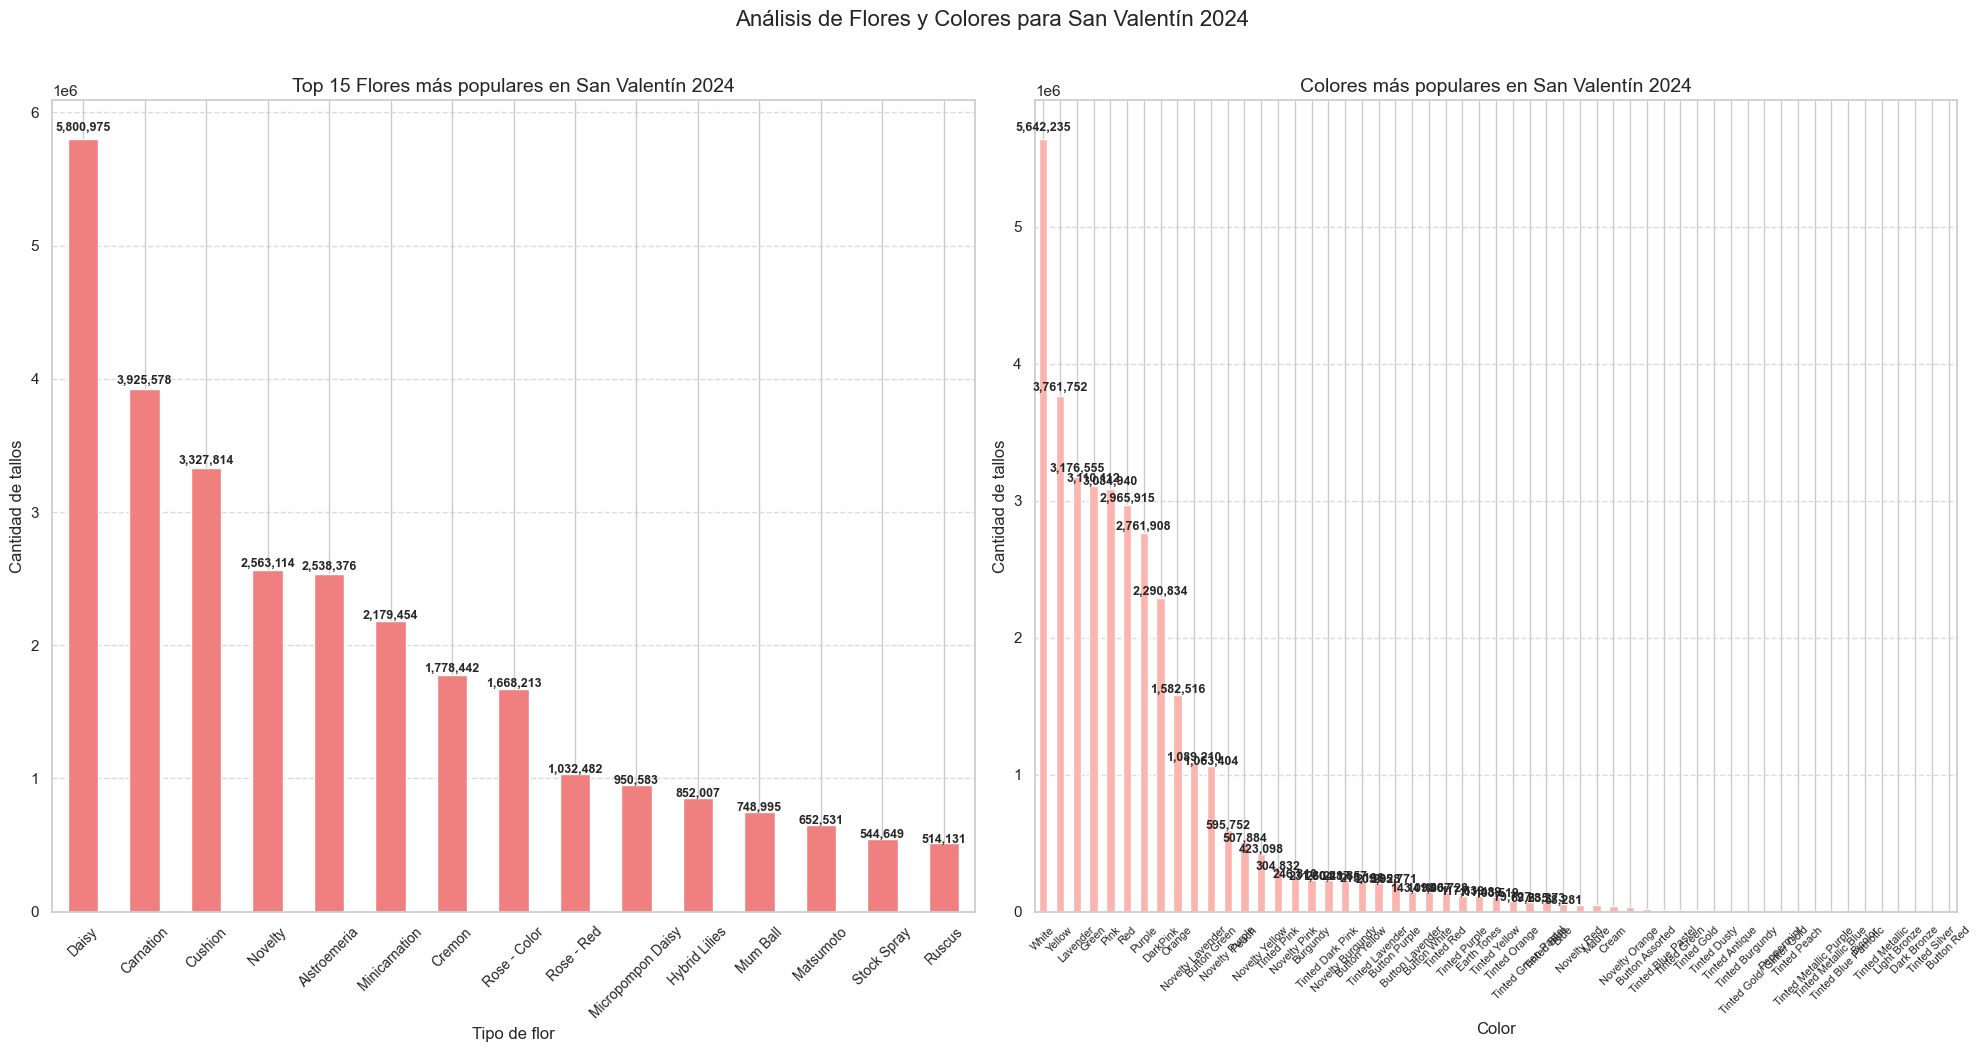

In [7]:
# Analizar los tipos de flores y colores utilizados en San Valentín 2024

# Primero definimos el periodo de San Valentín de 2024 si no existe
if 'valentine_period_2024' not in globals():
    # Filter data for the period from January 1, 2024 to February 14, 2024
    valentine_period_2024 = df[(df['Year'] == 2024) & 
                              (((df['Month'] == 1)) | 
                               ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Agrupar por color y sumar los tallos
stems_by_color = valentine_period_2024.groupby('Color')['Stems'].sum().sort_values(ascending=False)

# Agrupar por tipo de flor y sumar los tallos
stems_by_flower_valentine = valentine_period_2024.groupby('Flower')['Stems'].sum().sort_values(ascending=False)

# Crear un gráfico con dos subplots: Flores y Colores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot para las flores (Top 15)
top_flowers = stems_by_flower_valentine.head(15)
top_flowers.plot(kind='bar', color='lightcoral', ax=ax1)
ax1.set_title("Top 15 Flores más populares en San Valentín 2024", fontsize=14)
ax1.set_ylabel("Cantidad de tallos")
ax1.set_xlabel("Tipo de flor")
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot para los colores
stems_by_color.plot(kind='bar', colormap='Pastel1', ax=ax2)
ax2.set_title("Colores más populares en San Valentín 2024", fontsize=14)
ax2.set_ylabel("Cantidad de tallos")
ax2.set_xlabel("Color")
ax2.tick_params(axis='x', rotation=45, labelsize=8)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas a las barras más altas
for i, v in enumerate(top_flowers):
    if v > 20000:
        ax1.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

for i, v in enumerate(stems_by_color):
    if v > 50000:
        ax2.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.suptitle("Análisis de Flores y Colores para San Valentín 2024", fontsize=16, y=1.05)
plt.show()

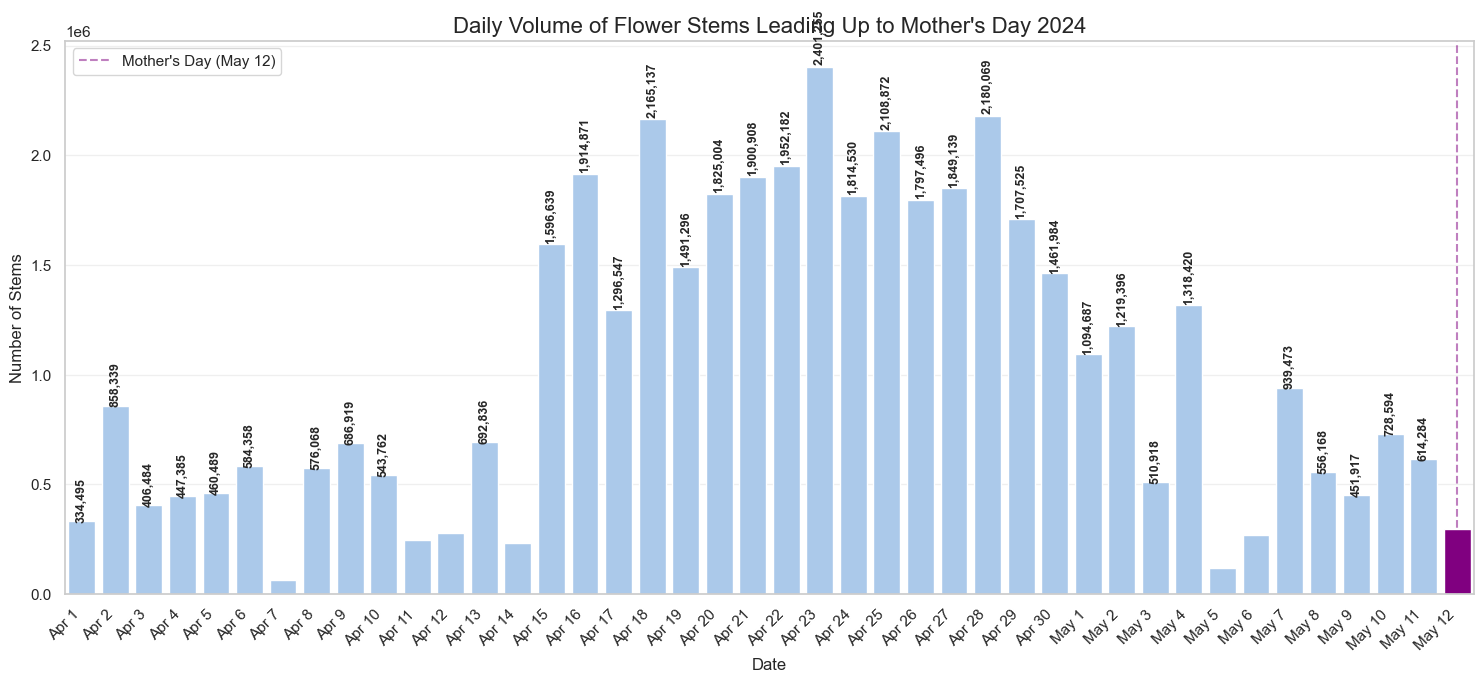

In [8]:
import numpy as np

# Filtrar datos para el período previo al Día de la Madre 2024 (abril y mayo)
mothers_day_period_2024 = df[(df['Year'] == 2024) & 
                           ((df['Month'] == 4) | 
                            (df['Month'] == 5) & (df['Day'] <= 12))]

# Encontrar la fecha exacta del Día de la Madre 2024
mothers_day_date = None
for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2024:
        mothers_day_date = date
        break

# Group by date and sum the Stems
daily_stems_mothers = mothers_day_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_mothers['date'] = pd.to_datetime('2024-' + 
                                        daily_stems_mothers['Month'].astype(str).str.zfill(2) + '-' + 
                                        daily_stems_mothers['Day'].astype(str).str.zfill(2))
daily_stems_mothers = daily_stems_mothers.sort_values('date')

# Plot the daily volume of stems during the Mother's Day period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_mothers)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_mothers['date']]
plt.xticks(range(len(daily_stems_mothers)), date_labels, rotation=45, ha='right')

# Highlight Mother's Day
if mothers_day_date:
    mothers_day_idx = daily_stems_mothers[
        (daily_stems_mothers['Month'] == mothers_day_date.month) & 
        (daily_stems_mothers['Day'] == mothers_day_date.day)
    ].index
    
    if not mothers_day_idx.empty:
        mothers_day_idx = mothers_day_idx[0]
        ax.patches[mothers_day_idx].set_facecolor('purple')

# Add text labels for peaks
for i, v in enumerate(daily_stems_mothers['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Mother\'s Day 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Mother's Day
if mothers_day_date and isinstance(mothers_day_idx, (int, np.integer)):
    plt.axvline(x=mothers_day_idx, color='purple', linestyle='--', alpha=0.5, label="Mother's Day (May 12)")

plt.legend()
plt.tight_layout()
plt.show()

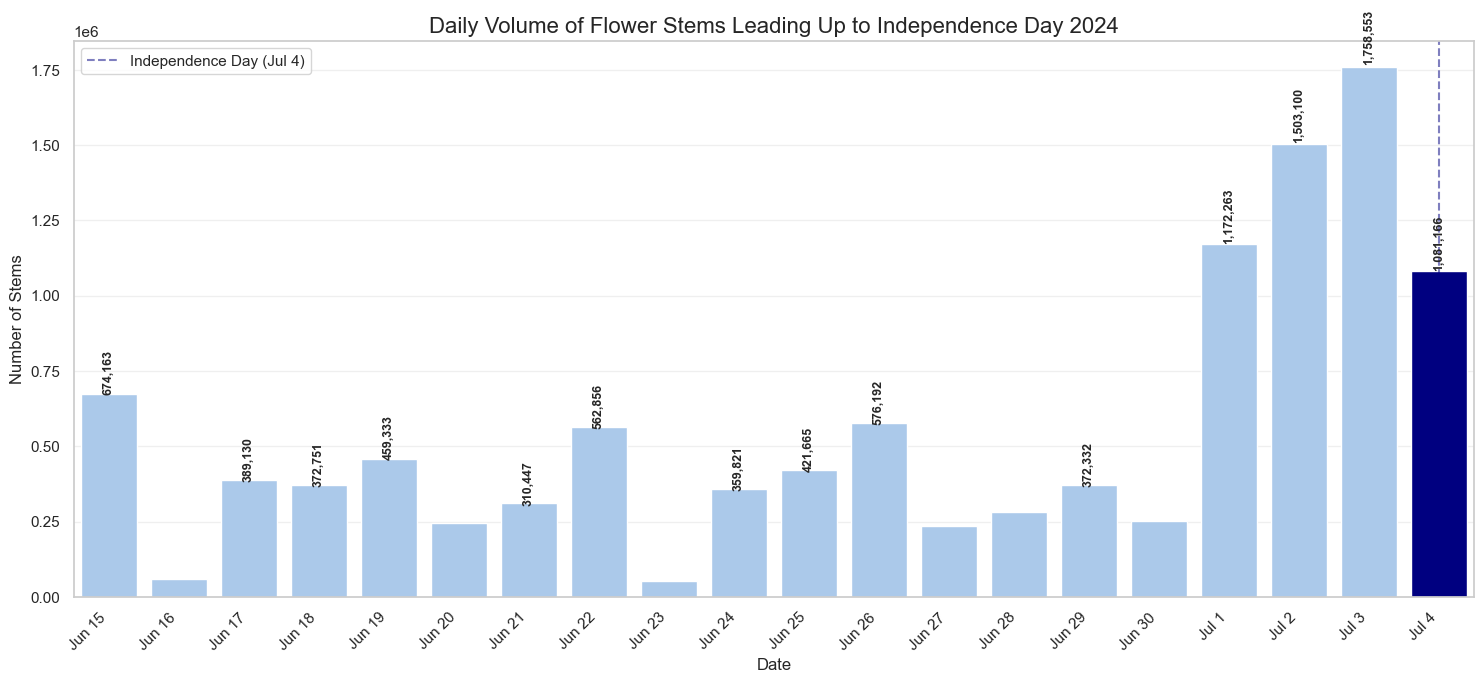

In [9]:
# Filter data for the period around Independence Day 2024 (June 15 to July 4)
independence_day_period_2024 = df[(df['Year'] == 2024) & 
                               ((df['Month'] == 6) & (df['Day'] >= 15)) | 
                               ((df['Month'] == 7) & (df['Day'] <= 4))]

# Group by date and sum the Stems
daily_stems_independence = independence_day_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_independence['date'] = pd.to_datetime('2024-' + 
                                             daily_stems_independence['Month'].astype(str).str.zfill(2) + '-' + 
                                             daily_stems_independence['Day'].astype(str).str.zfill(2))
daily_stems_independence = daily_stems_independence.sort_values('date')

# Plot the daily volume of stems during the Independence Day period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_independence)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_independence['date']]
plt.xticks(range(len(daily_stems_independence)), date_labels, rotation=45, ha='right')

# Highlight Independence Day
independence_idx = daily_stems_independence[
    (daily_stems_independence['Month'] == 7) & 
    (daily_stems_independence['Day'] == 4)
].index

if len(independence_idx) > 0:
    independence_idx = independence_idx[0]
    ax.patches[independence_idx].set_facecolor('navy')

# Add text labels for peaks
for i, v in enumerate(daily_stems_independence['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Independence Day 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Independence Day
if isinstance(independence_idx, (int, np.integer)):
    plt.axvline(x=independence_idx, color='navy', linestyle='--', alpha=0.5, label="Independence Day (Jul 4)")

plt.legend()
plt.tight_layout()
plt.show()

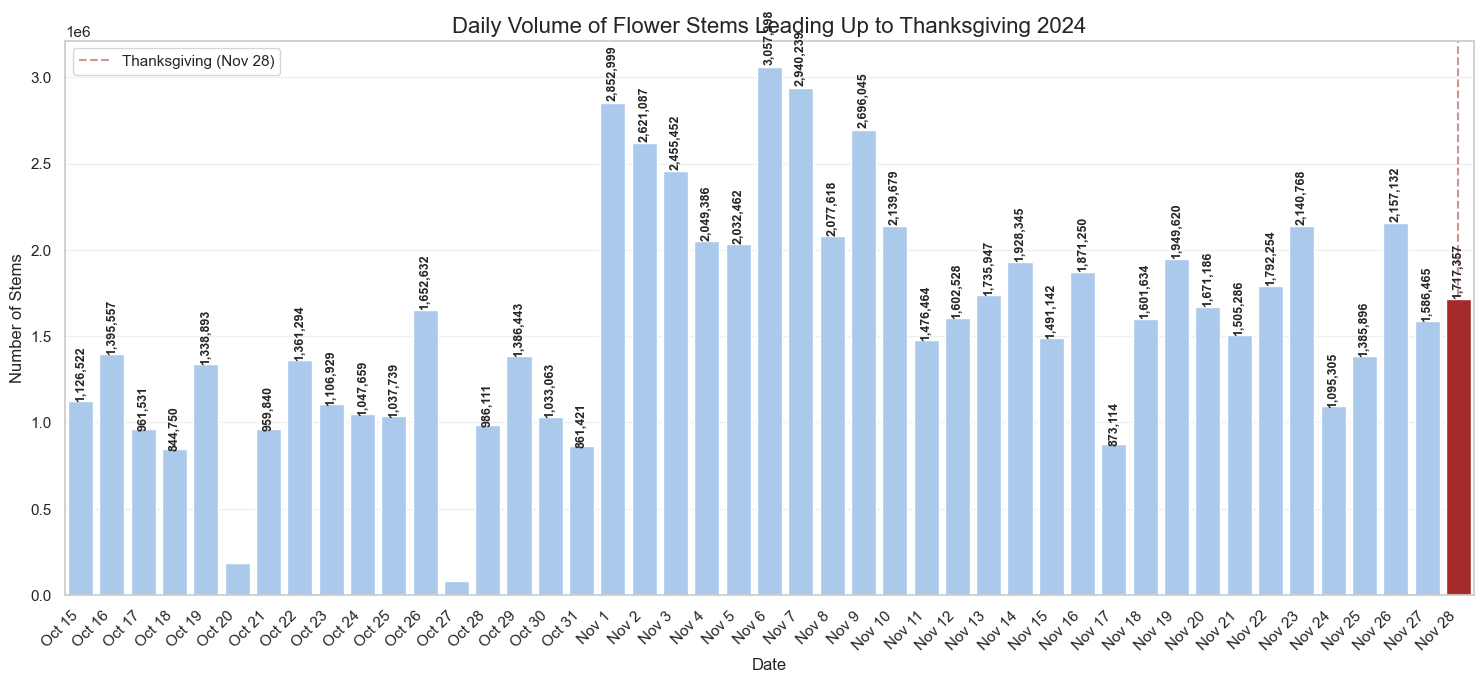

In [10]:
# Filter data for the period from October 15 to November 28, 2024 (Thanksgiving)
thanksgiving_period_2024 = df[(df['Year'] == 2024) & 
                           ((df['Month'] == 10) & (df['Day'] >= 15)) | 
                           ((df['Month'] == 11) & (df['Day'] <= 28))]

# Find the exact date of Thanksgiving 2024
thanksgiving_date = None
for date in holiday_dates_by_name['thanksgiving']:
    if date.year == 2024:
        thanksgiving_date = date
        break

# Group by date and sum the Stems
daily_stems_thanksgiving = thanksgiving_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_thanksgiving['date'] = pd.to_datetime('2024-' + 
                                             daily_stems_thanksgiving['Month'].astype(str).str.zfill(2) + '-' + 
                                             daily_stems_thanksgiving['Day'].astype(str).str.zfill(2))
daily_stems_thanksgiving = daily_stems_thanksgiving.sort_values('date')

# Plot the daily volume of stems during the Thanksgiving period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_thanksgiving)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_thanksgiving['date']]
plt.xticks(range(len(daily_stems_thanksgiving)), date_labels, rotation=45, ha='right')

# Highlight Thanksgiving Day
if thanksgiving_date:
    thanksgiving_idx = daily_stems_thanksgiving[
        (daily_stems_thanksgiving['Month'] == thanksgiving_date.month) & 
        (daily_stems_thanksgiving['Day'] == thanksgiving_date.day)
    ].index
    
    if not thanksgiving_idx.empty:
        thanksgiving_idx = thanksgiving_idx[0]
        ax.patches[thanksgiving_idx].set_facecolor('brown')

# Add text labels for significant peaks
for i, v in enumerate(daily_stems_thanksgiving['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Thanksgiving 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Thanksgiving Day
if thanksgiving_date and isinstance(thanksgiving_idx, (int, np.integer)):
    plt.axvline(x=thanksgiving_idx, color='brown', linestyle='--', alpha=0.5, label="Thanksgiving (Nov 28)")

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9452\2089579249.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


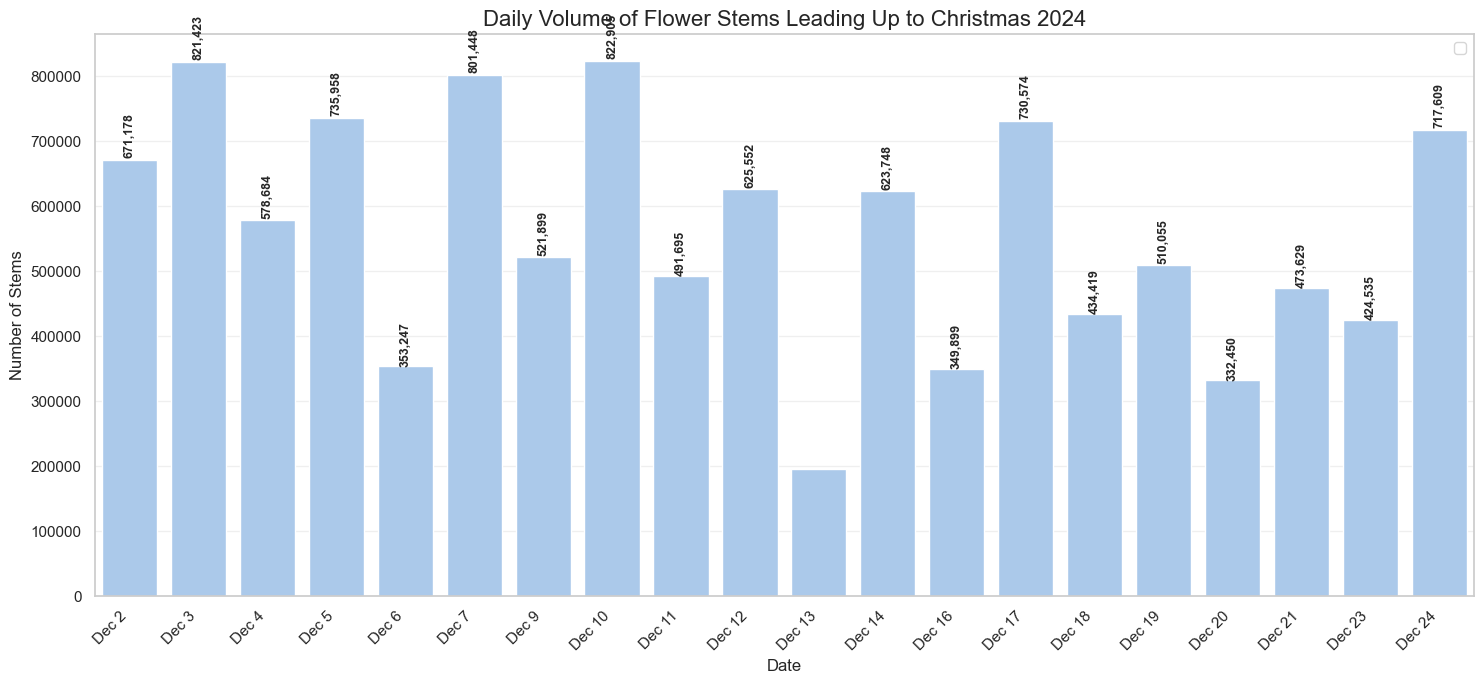

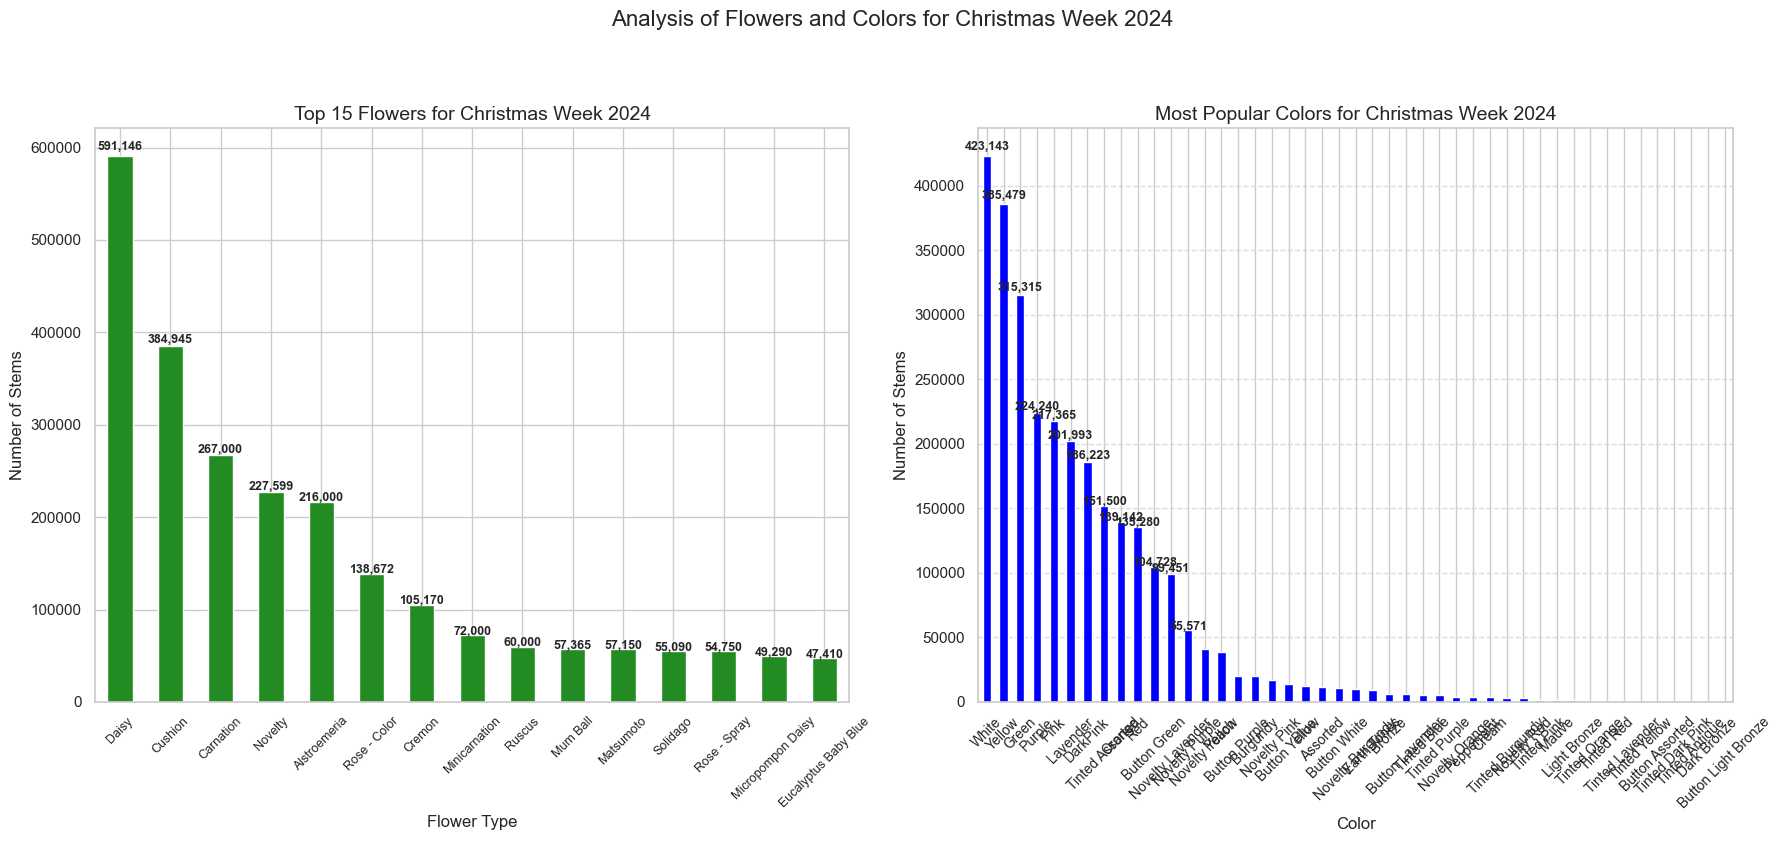

In [ ]:
# Filter data for the period from December 1 to December 25, 2024 (Christmas)
christmas_period_2024 = df[(df['Year'] == 2024) & 
                         (df['Month'] == 12) & 
                         (df['Day'] <= 25)]

# Find the exact date of Christmas 2024
christmas_date = None
for date in holiday_dates_by_name['christmas']:
    if date.year == 2024:
        christmas_date = date
        break

# Group by date and sum the Stems
daily_stems_christmas = christmas_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_christmas['date'] = pd.to_datetime('2024-' + 
                                          daily_stems_christmas['Month'].astype(str).str.zfill(2) + '-' + 
                                          daily_stems_christmas['Day'].astype(str).str.zfill(2))
daily_stems_christmas = daily_stems_christmas.sort_values('date')

# Plot the daily volume of stems during the Christmas period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_christmas)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_christmas['date']]
plt.xticks(range(len(daily_stems_christmas)), date_labels, rotation=45, ha='right')

# Highlight Christmas Day
if christmas_date:
    christmas_idx = daily_stems_christmas[
        (daily_stems_christmas['Month'] == christmas_date.month) & 
        (daily_stems_christmas['Day'] == christmas_date.day)
    ].index
    
    if not christmas_idx.empty:
        christmas_idx = christmas_idx[0]
        ax.patches[christmas_idx].set_facecolor('darkgreen')

# Add text labels for significant peaks
for i, v in enumerate(daily_stems_christmas['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Christmas 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Christmas Day
if christmas_date and isinstance(christmas_idx, (int, np.integer)):
    plt.axvline(x=christmas_idx, color='darkgreen', linestyle='--', alpha=0.5, label="Christmas (Dec 25)")

# Add a secondary analysis: most popular flowers and colors for Christmas
plt.legend()
plt.tight_layout()
plt.show()

# Analyze top flowers and colors used for Christmas
# Since there's no data for Christmas Day itself, let's use the week before Christmas (Dec 18-24)
christmas_week_data = christmas_period_2024[(christmas_period_2024['Month'] == 12) & 
                                          (christmas_period_2024['Day'] >= 18) & 
                                          (christmas_period_2024['Day'] <= 24)]

# Create a figure with two subplots for the analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 flowers for Christmas
stems_by_flower_christmas = christmas_week_data.groupby('Flower')['Stems'].sum().sort_values(ascending=False)
top_flowers_christmas = stems_by_flower_christmas.head(15)
top_flowers_christmas.plot(kind='bar', color='forestgreen', ax=ax1)
ax1.set_title("Top 15 Flowers for Christmas Week 2024", fontsize=14)
ax1.set_ylabel("Number of Stems")
ax1.set_xlabel("Flower Type")
ax1.tick_params(axis='x', rotation=45, labelsize=9)

# Top colors for Christmas
stems_by_color_christmas = christmas_week_data.groupby('Color')['Stems'].sum().sort_values(ascending=False)
stems_by_color_christmas.plot(kind='bar', colormap='winter', ax=ax2)
ax2.set_title("Most Popular Colors for Christmas Week 2024", fontsize=14)
ax2.set_ylabel("Number of Stems")
ax2.set_xlabel("Color")
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars for the top values
for i, v in enumerate(top_flowers_christmas):
    if v > 20000:
        ax1.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

for i, v in enumerate(stems_by_color_christmas):
    if v > 50000:
        ax2.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

plt.suptitle("Analysis of Flowers and Colors for Christmas Week 2024", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

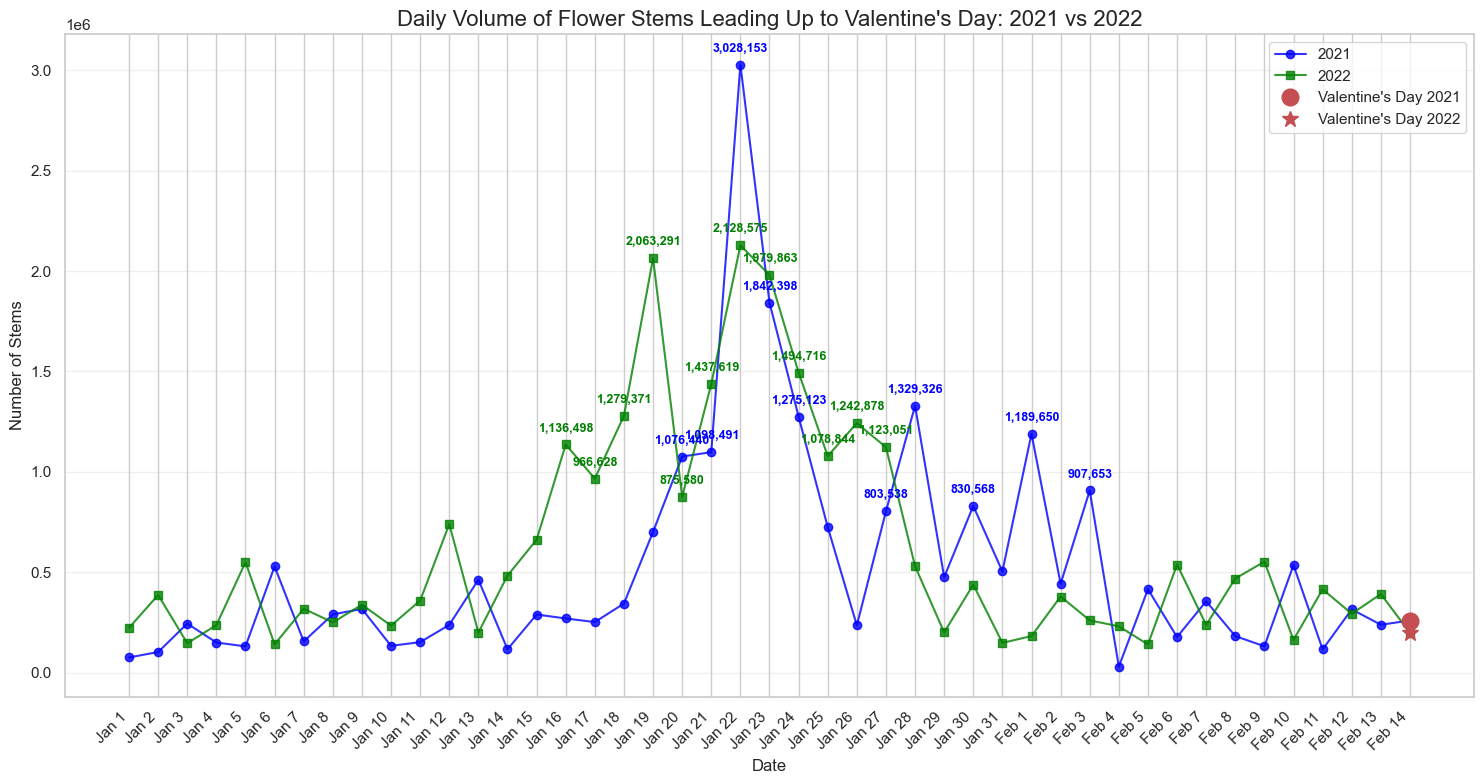

In [11]:
# Comparing Valentine's Day Stem Volume between 2021-2024
# Filter data for Valentine's Day periods in 2021-2022
valentine_2021 = df[(df['Year'] == 2021) & 
                     (((df['Month'] == 1)) | 
                     ((df['Month'] == 2) & (df['Day'] <= 14)))]

valentine_2022 = df[(df['Year'] == 2022) & 
                     (((df['Month'] == 1)) | 
                     ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Group by date and sum the stems for each year
daily_stems_valentine_2021 = valentine_2021.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_valentine_2021['date'] = pd.to_datetime('2021-' + 
                                           daily_stems_valentine_2021['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine_2021['Day'].astype(str).str.zfill(2))
daily_stems_valentine_2021 = daily_stems_valentine_2021.sort_values('date')

daily_stems_valentine_2022 = valentine_2022.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_valentine_2022['date'] = pd.to_datetime('2022-' + 
                                           daily_stems_valentine_2022['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine_2022['Day'].astype(str).str.zfill(2))
daily_stems_valentine_2022 = daily_stems_valentine_2022.sort_values('date')

# Create a comparison plot
plt.figure(figsize=(15, 8))

# Plot both years using line plots for better comparison
plt.plot(range(len(daily_stems_valentine_2021)), daily_stems_valentine_2021['Stems'], 
         marker='o', linestyle='-', color='blue', alpha=0.8, label='2021')

plt.plot(range(len(daily_stems_valentine_2022)), daily_stems_valentine_2022['Stems'], 
         marker='s', linestyle='-', color='green', alpha=0.8, label='2022')

# Add Valentine's Day 2021 marker
valentine_idx_2021 = daily_stems_valentine_2021[
    (daily_stems_valentine_2021['Month'] == 2) & 
    (daily_stems_valentine_2021['Day'] == 14)
].index
if not valentine_idx_2021.empty:
    valentine_idx_2021 = valentine_idx_2021[0]
    plt.plot(valentine_idx_2021, daily_stems_valentine_2021.iloc[valentine_idx_2021]['Stems'], 
             'ro', markersize=12, label="Valentine's Day 2021")

# Add Valentine's Day 2022 marker
valentine_idx_2022 = daily_stems_valentine_2022[
    (daily_stems_valentine_2022['Month'] == 2) & 
    (daily_stems_valentine_2022['Day'] == 14)
].index
if not valentine_idx_2022.empty:
    valentine_idx_2022 = valentine_idx_2022[0]
    plt.plot(valentine_idx_2022, daily_stems_valentine_2022.iloc[valentine_idx_2022]['Stems'], 
             'r*', markersize=12, label="Valentine's Day 2022")

# Format x-axis labels for 2021 (use these as reference)
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_valentine_2021['date']]
plt.xticks(range(len(date_labels)), date_labels, rotation=45, ha='right')

# Add labels and title
plt.title('Daily Volume of Flower Stems Leading Up to Valentine\'s Day: 2021 vs 2022', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Highlight key peaks
for i, v in enumerate(daily_stems_valentine_2021['Stems']):
    if v > 800000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='blue')

for i, v in enumerate(daily_stems_valentine_2022['Stems']):
    if v > 800000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='green')

plt.tight_layout()
plt.show()

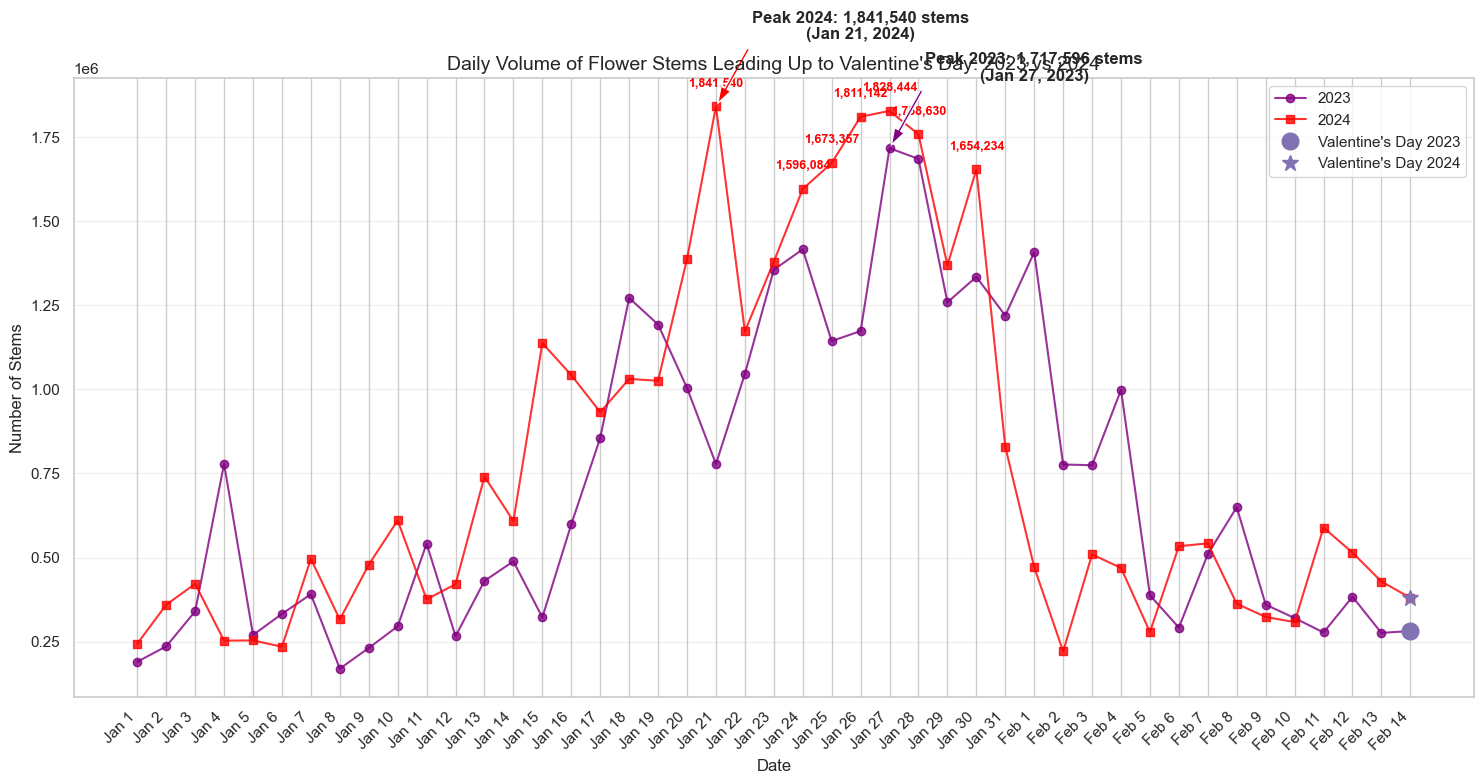

In [15]:
# Comparing Valentine's Day Stem Volume between 2023-2024
# Filter data for Valentine's Day periods in 2023-2024
valentine_2023 = df[(df['Year'] == 2023) & 
                     (((df['Month'] == 1)) | 
                     ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Group by date and sum the stems for each year
daily_stems_valentine_2023 = valentine_2023.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_valentine_2023['date'] = pd.to_datetime('2023-' + 
                                           daily_stems_valentine_2023['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine_2023['Day'].astype(str).str.zfill(2))
daily_stems_valentine_2023 = daily_stems_valentine_2023.sort_values('date')

# Create a comparison plot
plt.figure(figsize=(15, 8))

# Plot both years using line plots for better comparison
plt.plot(range(len(daily_stems_valentine_2023)), daily_stems_valentine_2023['Stems'], 
         marker='o', linestyle='-', color='purple', alpha=0.8, label='2023')

# We'll use the valentine data from cell 2 for 2024
# First check if we already have valentine_period_2024 defined from previous cells
if 'valentine_period_2024' in globals():
    # Use the data to create daily stems if not already created
    daily_stems_valentine_2024 = valentine_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
    daily_stems_valentine_2024['date'] = pd.to_datetime('2024-' + 
                                                   daily_stems_valentine_2024['Month'].astype(str).str.zfill(2) + '-' + 
                                                   daily_stems_valentine_2024['Day'].astype(str).str.zfill(2))
    daily_stems_valentine_2024 = daily_stems_valentine_2024.sort_values('date')

plt.plot(range(len(daily_stems_valentine_2024)), daily_stems_valentine_2024['Stems'], 
         marker='s', linestyle='-', color='red', alpha=0.8, label='2024')

# Add Valentine's Day 2023 marker
valentine_idx_2023 = daily_stems_valentine_2023[
    (daily_stems_valentine_2023['Month'] == 2) & 
    (daily_stems_valentine_2023['Day'] == 14)
].index
if not valentine_idx_2023.empty:
    valentine_idx_2023 = valentine_idx_2023[0]
    plt.plot(valentine_idx_2023, daily_stems_valentine_2023.iloc[valentine_idx_2023]['Stems'], 
             'mo', markersize=12, label="Valentine's Day 2023")

# Add Valentine's Day 2024 marker
valentine_idx_2024 = daily_stems_valentine_2024[
    (daily_stems_valentine_2024['Month'] == 2) & 
    (daily_stems_valentine_2024['Day'] == 14)
].index
if not valentine_idx_2024.empty:
    valentine_idx_2024 = valentine_idx_2024[0]
    plt.plot(valentine_idx_2024, daily_stems_valentine_2024.iloc[valentine_idx_2024]['Stems'], 
             'm*', markersize=12, label="Valentine's Day 2024")

# Format x-axis labels for 2023 (use these as reference)
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_valentine_2023['date']]
plt.xticks(range(len(date_labels)), date_labels, rotation=45, ha='right')

# Add labels and title
plt.title('Daily Volume of Flower Stems Leading Up to Valentine\'s Day: 2023 vs 2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Highlight key peaks for 2024
for i, v in enumerate(daily_stems_valentine_2024['Stems']):
    if v > 1500000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='red')

# Add annotation comparing the peak volumes between years
peak_2023 = daily_stems_valentine_2023['Stems'].max()
peak_2024 = daily_stems_valentine_2024['Stems'].max()
peak_idx_2023 = daily_stems_valentine_2023['Stems'].idxmax()
peak_idx_2024 = daily_stems_valentine_2024['Stems'].idxmax()
peak_date_2023 = daily_stems_valentine_2023.iloc[peak_idx_2023]['date'].strftime('%b %d, %Y')
peak_date_2024 = daily_stems_valentine_2024.iloc[peak_idx_2024]['date'].strftime('%b %d, %Y')

plt.annotate(f"Peak 2023: {peak_2023:,} stems\n({peak_date_2023})",
             xy=(peak_idx_2023, peak_2023), xycoords='data',
             xytext=(peak_idx_2023+5, peak_2023+200000), textcoords='data',
             arrowprops=dict(facecolor='purple', shrink=0.05, width=2, headwidth=8),
             ha='center', fontweight='bold')

plt.annotate(f"Peak 2024: {peak_2024:,} stems\n({peak_date_2024})",
             xy=(peak_idx_2024, peak_2024), xycoords='data',
             xytext=(peak_idx_2024+5, peak_2024+200000), textcoords='data',
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

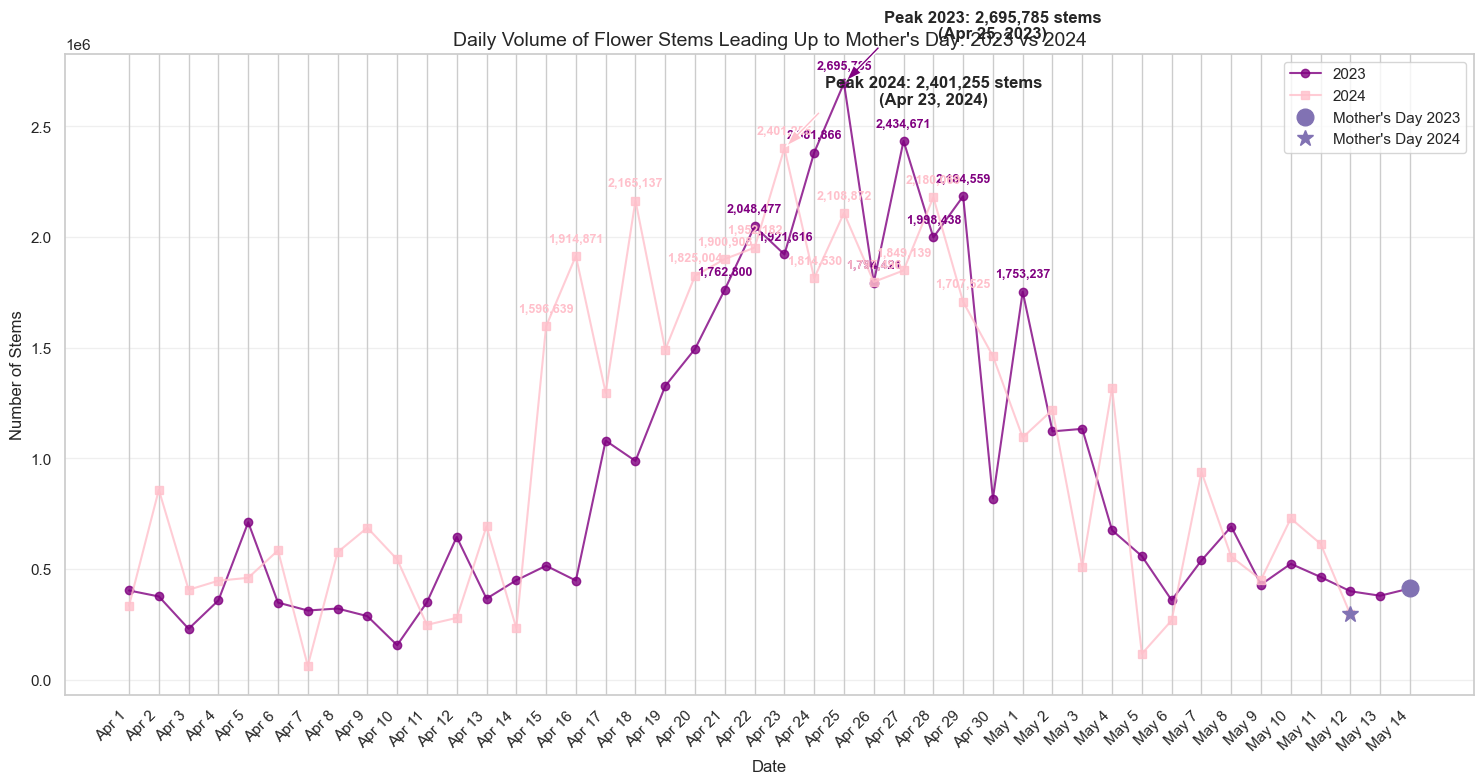

In [17]:
# Comparing Mother's Day Stem Volume between 2023-2024
# Filter data for Mother's Day periods in 2023
mothers_day_2023 = df[(df['Year'] == 2023) & 
                     (((df['Month'] == 4)) | 
                     ((df['Month'] == 5) & (df['Day'] <= 14)))]

# Find the exact date of Mother's Day 2023
mothers_day_date_2023 = None
for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2023:
        mothers_day_date_2023 = date
        break

# Group by date and sum the stems for 2023
daily_stems_mothers_2023 = mothers_day_2023.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_mothers_2023['date'] = pd.to_datetime('2023-' + 
                                           daily_stems_mothers_2023['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_mothers_2023['Day'].astype(str).str.zfill(2))
daily_stems_mothers_2023 = daily_stems_mothers_2023.sort_values('date')

# Create a comparison plot
plt.figure(figsize=(15, 8))

# Plot both years using line plots for better comparison
plt.plot(range(len(daily_stems_mothers_2023)), daily_stems_mothers_2023['Stems'], 
         marker='o', linestyle='-', color='purple', alpha=0.8, label='2023')

# Use the mothers_day data from cell 5 for 2024
plt.plot(range(len(daily_stems_mothers)), daily_stems_mothers['Stems'], 
         marker='s', linestyle='-', color='pink', alpha=0.8, label='2024')

# Add Mother's Day 2023 marker
mothers_day_idx_2023 = daily_stems_mothers_2023[
    (daily_stems_mothers_2023['Month'] == mothers_day_date_2023.month) & 
    (daily_stems_mothers_2023['Day'] == mothers_day_date_2023.day)
].index
if not mothers_day_idx_2023.empty:
    mothers_day_idx_2023 = mothers_day_idx_2023[0]
    plt.plot(mothers_day_idx_2023, daily_stems_mothers_2023.iloc[mothers_day_idx_2023]['Stems'], 
             'mo', markersize=12, label="Mother's Day 2023")

# Add Mother's Day 2024 marker
if mothers_day_date:
    plt.plot(mothers_day_idx, daily_stems_mothers.iloc[mothers_day_idx]['Stems'], 
             'm*', markersize=12, label="Mother's Day 2024")

# Format x-axis labels for 2023 (use these as reference)
date_labels_mothers = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_mothers_2023['date']]
plt.xticks(range(len(date_labels_mothers)), date_labels_mothers, rotation=45, ha='right')

# Add labels and title
plt.title('Daily Volume of Flower Stems Leading Up to Mother\'s Day: 2023 vs 2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Highlight key peaks
for i, v in enumerate(daily_stems_mothers_2023['Stems']):
    if v > 1500000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='purple')

for i, v in enumerate(daily_stems_mothers['Stems']):
    if v > 1500000:  # Highlight significant peaks
        plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='pink')

# Add annotation comparing the peak volumes between years
peak_2023_mothers = daily_stems_mothers_2023['Stems'].max()
peak_2024_mothers = daily_stems_mothers['Stems'].max()
peak_idx_2023_mothers = daily_stems_mothers_2023['Stems'].idxmax()
peak_idx_2024_mothers = daily_stems_mothers['Stems'].idxmax()
peak_date_2023_mothers = daily_stems_mothers_2023.iloc[peak_idx_2023_mothers]['date'].strftime('%b %d, %Y')
peak_date_2024_mothers = daily_stems_mothers.iloc[peak_idx_2024_mothers]['date'].strftime('%b %d, %Y')

plt.annotate(f"Peak 2023: {peak_2023_mothers:,} stems\n({peak_date_2023_mothers})",
             xy=(peak_idx_2023_mothers, peak_2023_mothers), xycoords='data',
             xytext=(peak_idx_2023_mothers+5, peak_2023_mothers+200000), textcoords='data',
             arrowprops=dict(facecolor='purple', shrink=0.05, width=2, headwidth=8),
             ha='center', fontweight='bold')

plt.annotate(f"Peak 2024: {peak_2024_mothers:,} stems\n({peak_date_2024_mothers})",
             xy=(peak_idx_2024_mothers, peak_2024_mothers), xycoords='data',
             xytext=(peak_idx_2024_mothers+5, peak_2024_mothers+200000), textcoords='data',
             arrowprops=dict(facecolor='pink', shrink=0.05, width=2, headwidth=8),
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

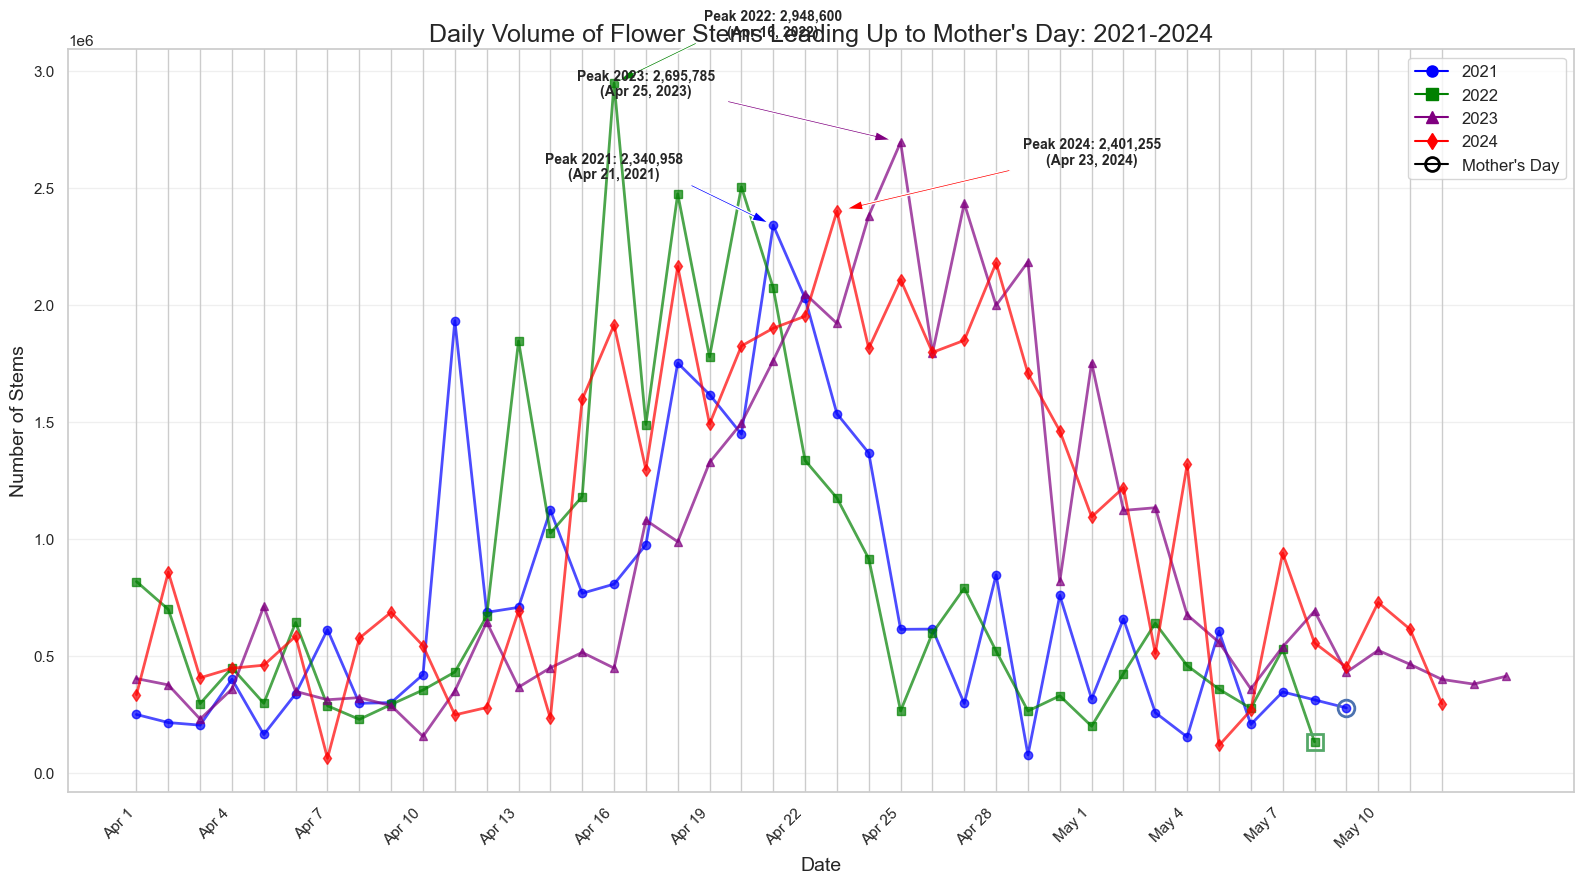

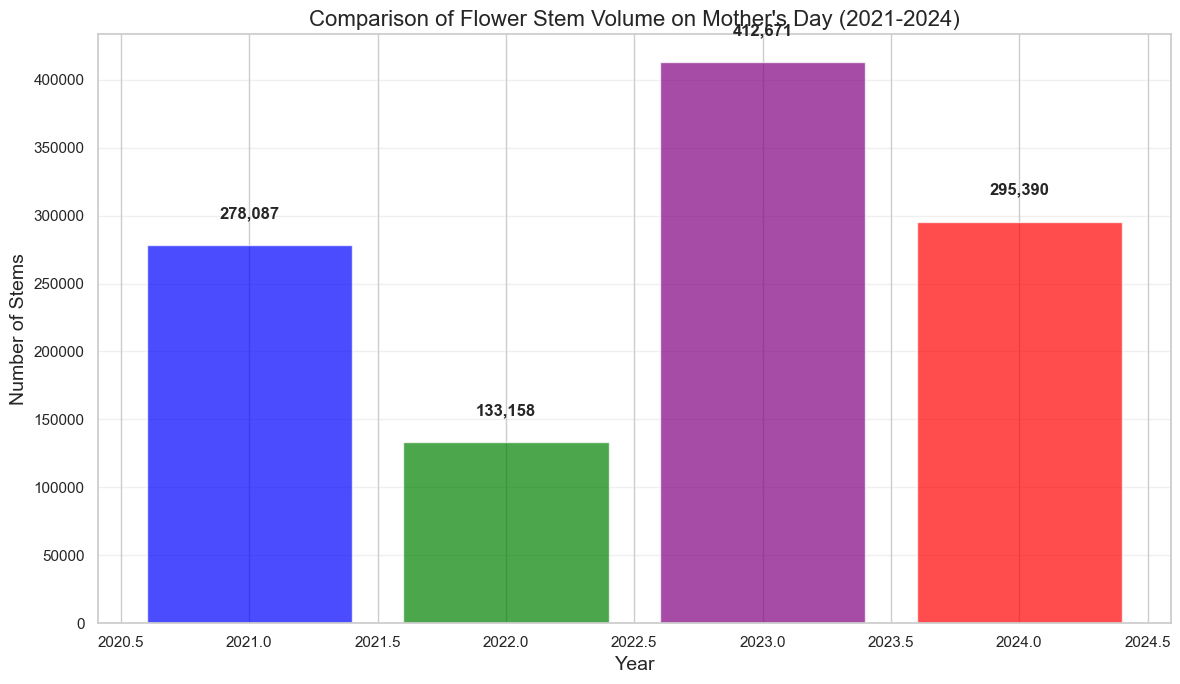

In [ ]:
from matplotlib.lines import Line2D

# Compare Mother's Day stem volume across 2021-2024
# Filter data for Mother's Day periods in each year
mothers_day_2021 = df[(df['Year'] == 2021) & 
                     (((df['Month'] == 4)) | 
                     ((df['Month'] == 5) & (df['Day'] <= 9)))]  # Mother's Day 2021 was May 9

mothers_day_2022 = df[(df['Year'] == 2022) & 
                     (((df['Month'] == 4)) | 
                     ((df['Month'] == 5) & (df['Day'] <= 8)))]  # Mother's Day 2022 was May 8

# Group by date and sum the stems for each year
daily_stems_mothers_2021 = mothers_day_2021.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_mothers_2021['date'] = pd.to_datetime('2021-' + 
                                           daily_stems_mothers_2021['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_mothers_2021['Day'].astype(str).str.zfill(2))
daily_stems_mothers_2021 = daily_stems_mothers_2021.sort_values('date')

daily_stems_mothers_2022 = mothers_day_2022.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
daily_stems_mothers_2022['date'] = pd.to_datetime('2022-' + 
                                           daily_stems_mothers_2022['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_mothers_2022['Day'].astype(str).str.zfill(2))
daily_stems_mothers_2022 = daily_stems_mothers_2022.sort_values('date')

# Create a figure with better size for 4 lines
plt.figure(figsize=(16, 9))

# Find Mother's Day dates for each year from holiday_dates_by_name
mothers_day_date_2021 = None
mothers_day_date_2022 = None
mothers_day_date_2024 = mothers_day_date  # Already found in previous cells

for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2021:
        mothers_day_date_2021 = date
    elif date.year == 2022:
        mothers_day_date_2022 = date

# Plot all years using line plots with different colors and markers
plt.plot(range(len(daily_stems_mothers_2021)), daily_stems_mothers_2021['Stems'], 
         marker='o', linestyle='-', color='blue', alpha=0.7, linewidth=2, label='2021')

plt.plot(range(len(daily_stems_mothers_2022)), daily_stems_mothers_2022['Stems'], 
         marker='s', linestyle='-', color='green', alpha=0.7, linewidth=2, label='2022')

plt.plot(range(len(daily_stems_mothers_2023)), daily_stems_mothers_2023['Stems'], 
         marker='^', linestyle='-', color='purple', alpha=0.7, linewidth=2, label='2023')

plt.plot(range(len(daily_stems_mothers)), daily_stems_mothers['Stems'], 
         marker='d', linestyle='-', color='red', alpha=0.7, linewidth=2, label='2024')

# Create date labels from the longest dataset to use as reference
max_len = max(len(daily_stems_mothers_2021), len(daily_stems_mothers_2022), 
              len(daily_stems_mothers_2023), len(daily_stems_mothers))
reference_dates = daily_stems_mothers_2021 if len(daily_stems_mothers_2021) == max_len else daily_stems_mothers

# Format x-axis labels - use every 3 days to avoid crowding
date_labels = [f"{d.month_name()[:3]} {d.day}" if i % 3 == 0 else "" for i, d in enumerate(reference_dates['date'])]
plt.xticks(range(len(reference_dates)), date_labels, rotation=45, ha='right')

# Mark Mother's Day for each year with special markers
mothers_day_idx_2021 = daily_stems_mothers_2021[
    (daily_stems_mothers_2021['Month'] == mothers_day_date_2021.month) & 
    (daily_stems_mothers_2021['Day'] == mothers_day_date_2021.day)
].index
if not mothers_day_idx_2021.empty:
    mothers_day_idx_2021 = mothers_day_idx_2021[0]
    plt.plot(mothers_day_idx_2021, daily_stems_mothers_2021.iloc[mothers_day_idx_2021]['Stems'], 
             'bo', markersize=12, fillstyle='none', markeredgewidth=2)

mothers_day_idx_2022 = daily_stems_mothers_2022[
    (daily_stems_mothers_2022['Month'] == mothers_day_date_2022.month) & 
    (daily_stems_mothers_2022['Day'] == mothers_day_date_2022.day)
].index
if not mothers_day_idx_2022.empty:
    mothers_day_idx_2022 = mothers_day_idx_2022[0]
    plt.plot(mothers_day_idx_2022, daily_stems_mothers_2022.iloc[mothers_day_idx_2022]['Stems'], 
             'gs', markersize=12, fillstyle='none', markeredgewidth=2)

# Add labels and title
plt.title('Daily Volume of Flower Stems Leading Up to Mother\'s Day: 2021-2024', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Create a custom legend with Mother's Day markers
legend_elements = [
    Line2D([0], [0], marker='o', color='blue', label='2021', markersize=8),
    Line2D([0], [0], marker='s', color='green', label='2022', markersize=8),
    Line2D([0], [0], marker='^', color='purple', label='2023', markersize=8),
    Line2D([0], [0], marker='d', color='red', label='2024', markersize=8),
    Line2D([0], [0], marker='o', color='black', label="Mother's Day", 
           fillstyle='none', markeredgewidth=2, markersize=10)
]
plt.legend(handles=legend_elements, fontsize=12)

# Find peak values for each year
peak_2021_mothers = daily_stems_mothers_2021['Stems'].max()
peak_idx_2021_mothers = daily_stems_mothers_2021['Stems'].idxmax()
peak_date_2021_mothers = daily_stems_mothers_2021.iloc[peak_idx_2021_mothers]['date'].strftime('%b %d, %Y')

peak_2022_mothers = daily_stems_mothers_2022['Stems'].max()
peak_idx_2022_mothers = daily_stems_mothers_2022['Stems'].idxmax()
peak_date_2022_mothers = daily_stems_mothers_2022.iloc[peak_idx_2022_mothers]['date'].strftime('%b %d, %Y')

# Annotate peak values if they exceed a threshold
if peak_2021_mothers > 1500000:
    plt.annotate(f"Peak 2021: {peak_2021_mothers:,}\n({peak_date_2021_mothers})",
                xy=(peak_idx_2021_mothers, peak_2021_mothers), xycoords='data',
                xytext=(peak_idx_2021_mothers-5, peak_2021_mothers+200000), textcoords='data',
                arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=7),
                ha='center', fontweight='bold', fontsize=10)

if peak_2022_mothers > 1500000:
    plt.annotate(f"Peak 2022: {peak_2022_mothers:,}\n({peak_date_2022_mothers})",
                xy=(peak_idx_2022_mothers, peak_2022_mothers), xycoords='data',
                xytext=(peak_idx_2022_mothers+5, peak_2022_mothers+200000), textcoords='data',
                arrowprops=dict(facecolor='green', shrink=0.05, width=1.5, headwidth=7),
                ha='center', fontweight='bold', fontsize=10)

# Reuse previously defined annotations for 2023 and 2024
plt.annotate(f"Peak 2023: {peak_2023_mothers:,}\n({peak_date_2023_mothers})",
            xy=(peak_idx_2023_mothers, peak_2023_mothers), xycoords='data',
            xytext=(peak_idx_2023_mothers-8, peak_2023_mothers+200000), textcoords='data',
            arrowprops=dict(facecolor='purple', shrink=0.05, width=1.5, headwidth=7),
            ha='center', fontweight='bold', fontsize=10)

plt.annotate(f"Peak 2024: {peak_2024_mothers:,}\n({peak_date_2024_mothers})",
            xy=(peak_idx_2024_mothers, peak_2024_mothers), xycoords='data',
            xytext=(peak_idx_2024_mothers+8, peak_2024_mothers+200000), textcoords='data',
            arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=7),
            ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Add a bar chart comparing Mother's Day actual dates
plt.figure(figsize=(12, 7))
years = [2021, 2022, 2023, 2024]
mother_day_stems = []

# Get stem counts for Mother's Day itself
for year, date in [(2021, mothers_day_date_2021), (2022, mothers_day_date_2022), 
                   (2023, mothers_day_date_2023), (2024, mothers_day_date)]:
    if date:
        stems = df[(df['Year'] == year) & (df['Month'] == date.month) & 
                   (df['Day'] == date.day)]['Stems'].sum()
        mother_day_stems.append(stems)
    else:
        mother_day_stems.append(0)

# Create bar chart for Mother's Day comparison
bars = plt.bar(years, mother_day_stems, color=['blue', 'green', 'purple', 'red'], alpha=0.7)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20000,
             f'{mother_day_stems[i]:,}', ha='center', fontweight='bold')

plt.title("Comparison of Flower Stem Volume on Mother's Day (2021-2024)", fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

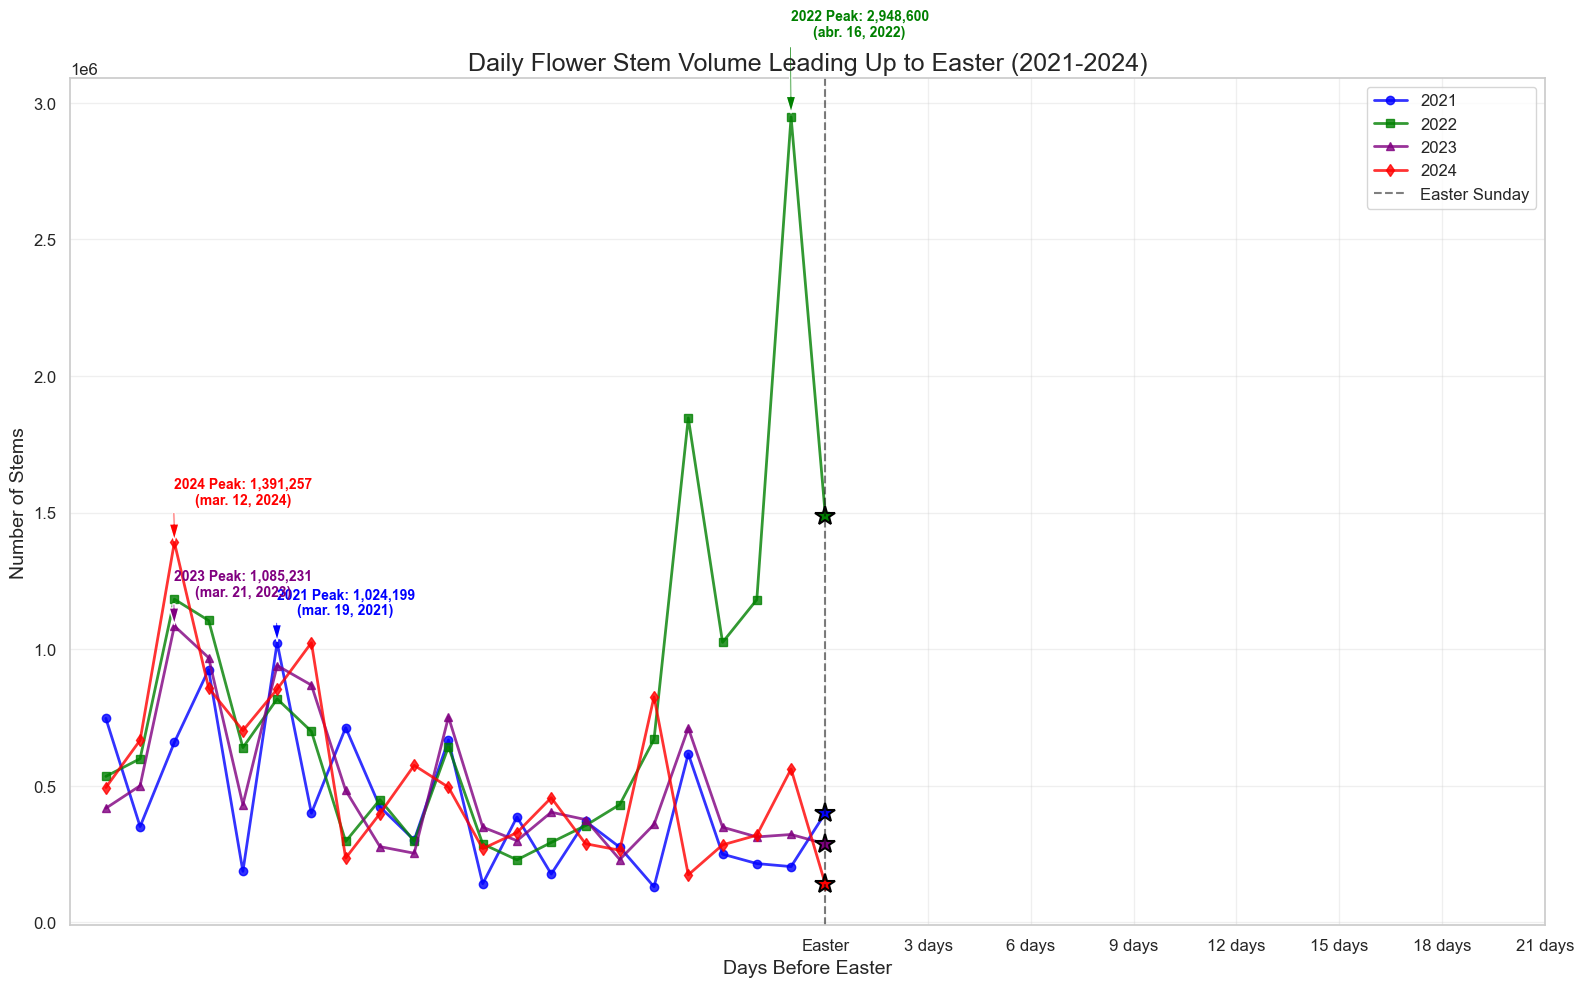

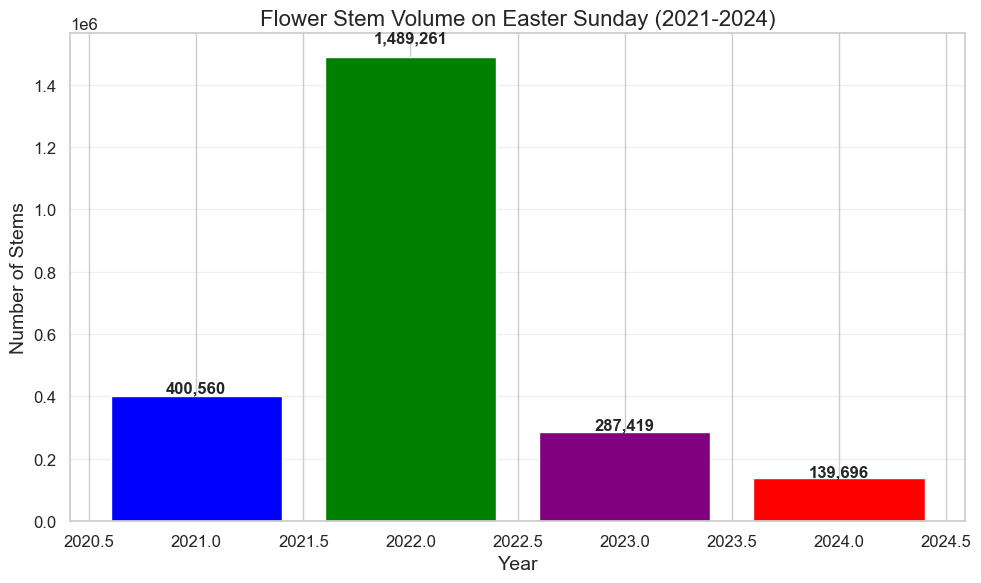

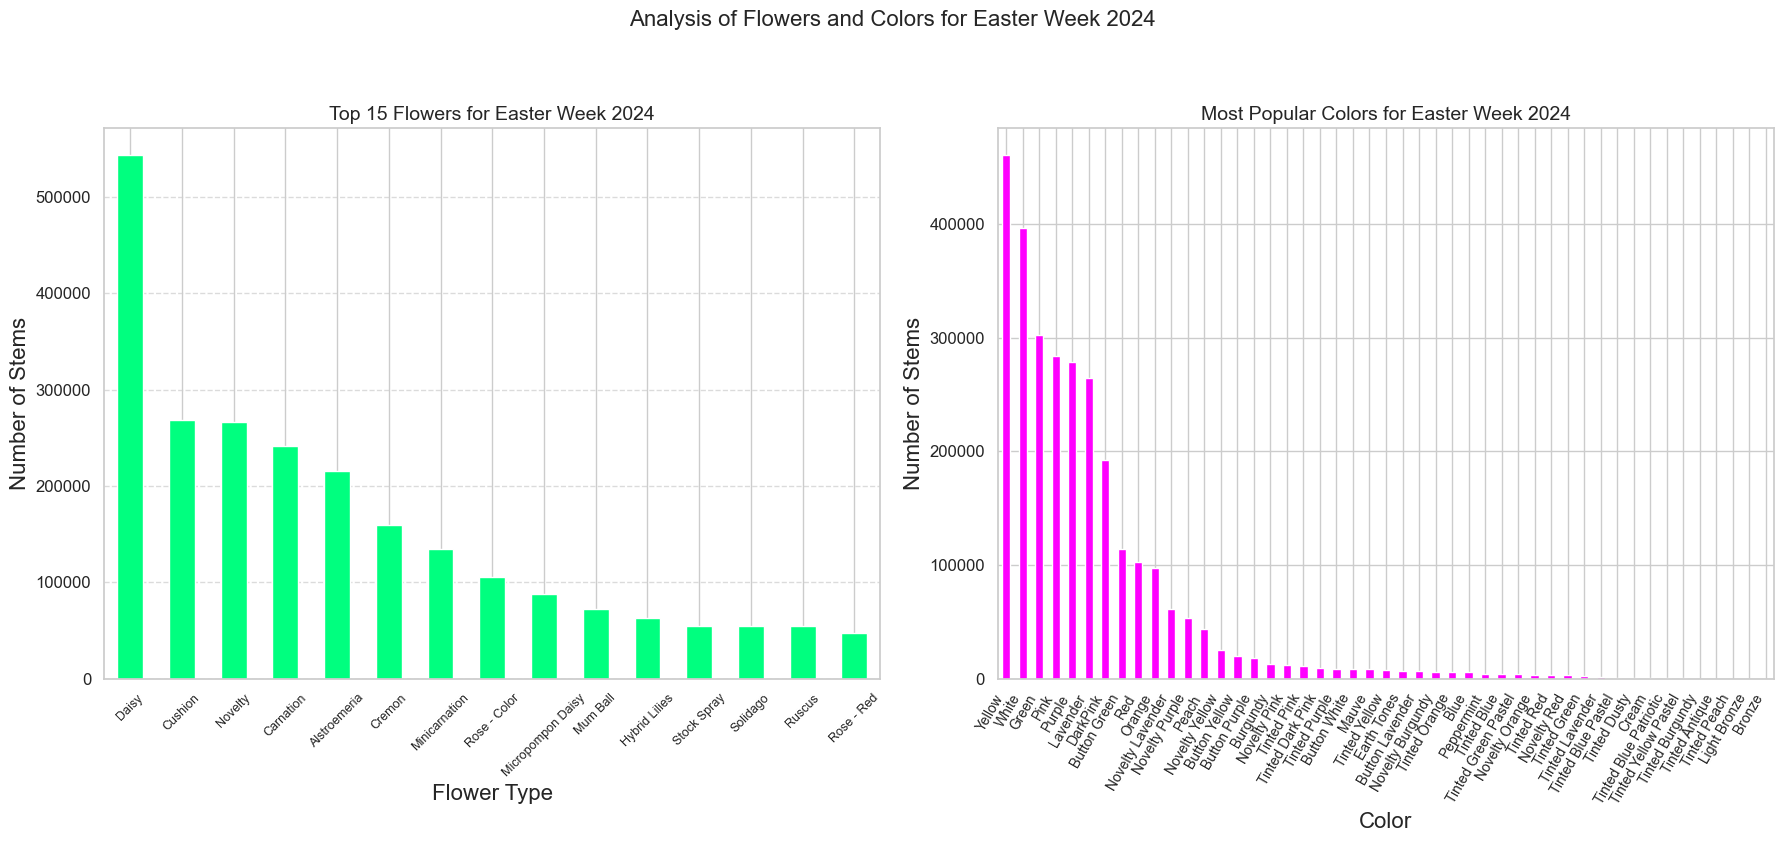

In [45]:
# --- Analizar volumen de tallos para Pascua (2021-2024) ---

# Definir fechas de Pascua
easter_dates = {
    2021: pd.Timestamp('2021-04-04'),
    2022: pd.Timestamp('2022-04-17'),
    2023: pd.Timestamp('2023-04-09'),
    2024: pd.Timestamp('2024-03-31')
}

# Agregar fechas de Pascua al diccionario de feriados
if 'easter' not in holiday_dates_by_name:
    holiday_dates_by_name['easter'] = [easter_dates[year] for year in easter_dates]

# Filtrar datos: 3 semanas antes de cada Pascua
easter_periods = {}
for year in range(2021, 2025):
    easter_date = easter_dates[year]
    start_date = easter_date - pd.Timedelta(days=21)
    easter_periods[year] = df[(df['Date'] >= start_date) & (df['Date'] <= easter_date)]

# Agrupar por día
easter_daily_stems = {}
for year in range(2021, 2025):
    daily = easter_periods[year].groupby(['Date'])['Stems'].sum().reset_index()
    daily['Days to Easter'] = (easter_dates[year] - daily['Date']).dt.days
    easter_daily_stems[year] = daily.sort_values('Date')

# --- Gráfico líneas volumen de tallos hacia Pascua ---
plt.figure(figsize=(16, 10))
colors = {2021: 'blue', 2022: 'green', 2023: 'purple', 2024: 'red'}
markers = {2021: 'o', 2022: 's', 2023: '^', 2024: 'd'}

for year in range(2021, 2025):
    data = easter_daily_stems[year]
    plt.plot(data['Days to Easter'], data['Stems'], 
             marker=markers[year], linestyle='-', color=colors[year],
             alpha=0.8, linewidth=2, label=f'{year}')
    
    # Marcar Domingo de Pascua
    easter_data = data[data['Days to Easter'] == 0]
    if not easter_data.empty:
        plt.plot(0, easter_data['Stems'].values[0], 
                 marker='*', markersize=15, color=colors[year], 
                 markeredgecolor='black', markeredgewidth=1.5)

plt.xlabel('Days Before Easter', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.title('Daily Flower Stem Volume Leading Up to Easter (2021-2024)', fontsize=18)
plt.grid(alpha=0.3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Easter Sunday')
plt.gca().invert_xaxis()
plt.xticks(range(0, -22, -3), [f'{abs(x)} days' if x != 0 else 'Easter' for x in range(0, -22, -3)])
plt.legend(fontsize=12)

# Anotar picos
for year in range(2021, 2025):
    data = easter_daily_stems[year]
    peak_row = data.loc[data['Stems'].idxmax()]
    peak_stems = peak_row['Stems']
    peak_days_before = peak_row['Days to Easter']
    peak_date = peak_row['Date'].strftime('%b %d, %Y')
    
    plt.annotate(f"{year} Peak: {peak_stems:,}\n({peak_date})",
                 xy=(peak_days_before, peak_stems), xycoords='data',
                 xytext=(peak_days_before-2, peak_stems + peak_stems*0.1),
                 textcoords='data', 
                 arrowprops=dict(facecolor=colors[year], shrink=0.05, width=1.5, headwidth=7),
                 ha='center', fontweight='bold', fontsize=10, color=colors[year])

plt.tight_layout()
plt.show()

# --- Gráfico de barras volumen en Domingo de Pascua ---
plt.figure(figsize=(10, 6))
easter_stems = []
for year in range(2021, 2025):
    easter_stem_count = df[df['Date'] == easter_dates[year]]['Stems'].sum()
    easter_stems.append(easter_stem_count)

bars = plt.bar(range(2021, 2025), easter_stems, color=[colors[y] for y in range(2021, 2025)])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.03,
             f'{int(height):,}', ha='center', fontweight='bold')

plt.title("Flower Stem Volume on Easter Sunday (2021-2024)", fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Análisis de flores y colores Semana de Pascua 2024 ---
easter_week_data_2024 = df[(df['Date'] >= easter_dates[2024] - pd.Timedelta(days=7)) &
                           (df['Date'] <= easter_dates[2024])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 flores
stems_by_flower = easter_week_data_2024.groupby('Flower')['Stems'].sum().sort_values(ascending=False)
top_flowers = stems_by_flower.head(15)
top_flowers.plot(kind='bar', color='springgreen', ax=ax1)
ax1.set_title("Top 15 Flowers for Easter Week 2024", fontsize=14)
ax1.set_ylabel("Number of Stems")
ax1.set_xlabel("Flower Type")
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Top colores (MEJORADO)
stems_by_color = easter_week_data_2024.groupby('Color')['Stems'].sum().sort_values(ascending=False)
stems_by_color.plot(kind='bar', colormap='spring', ax=ax2)
ax2.set_title("Most Popular Colors for Easter Week 2024", fontsize=14)
ax2.set_ylabel("Number of Stems")
ax2.set_xlabel("Color")
ax2.tick_params(axis='x', rotation=60, labelsize=10)

# Mejorar visibilidad de los nombres
for label in ax2.get_xticklabels():
    label.set_ha('right')

plt.subplots_adjust(bottom=0.25)  # Espacio extra

plt.suptitle("Analysis of Flowers and Colors for Easter Week 2024", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

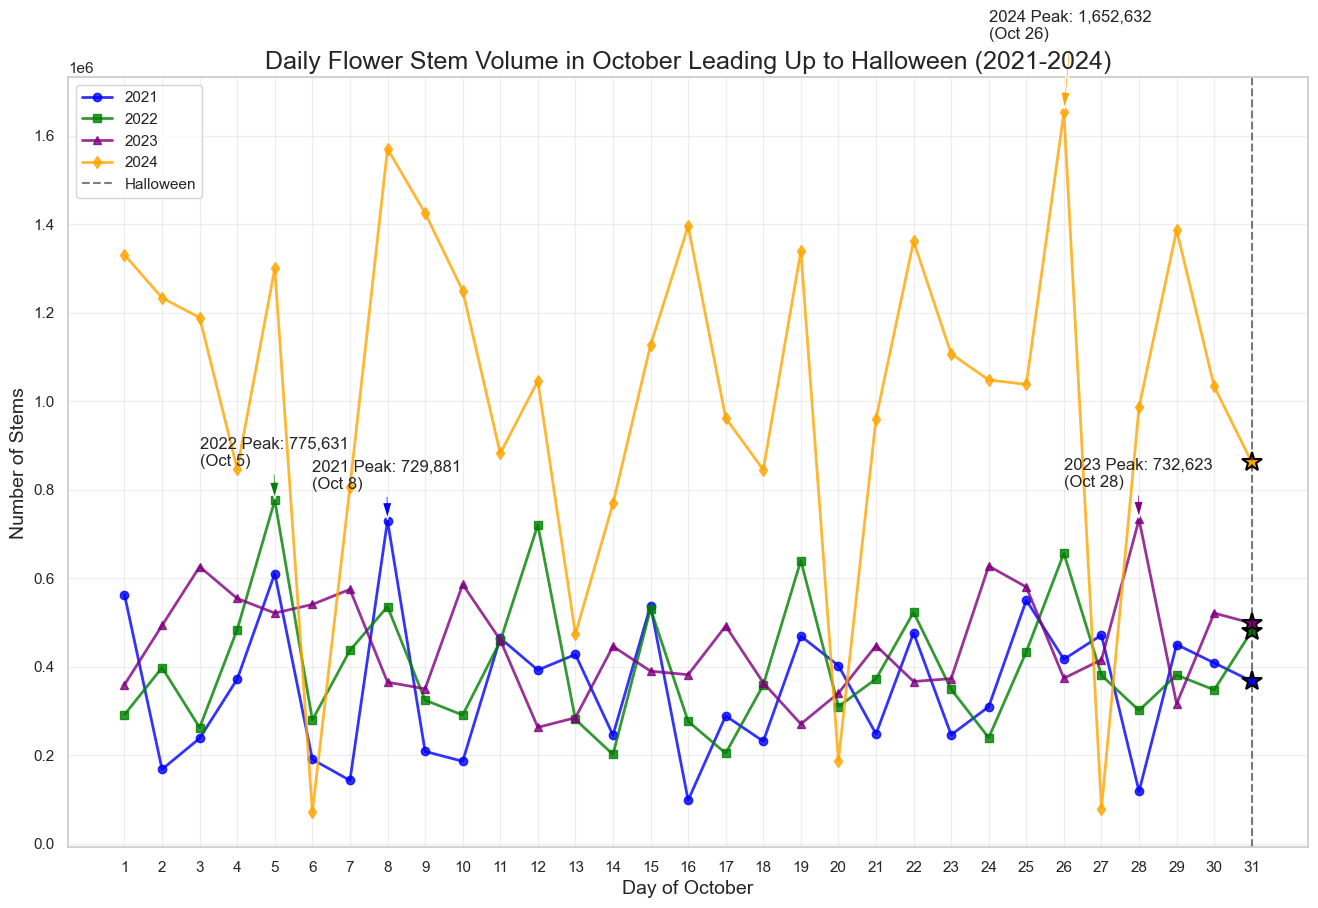

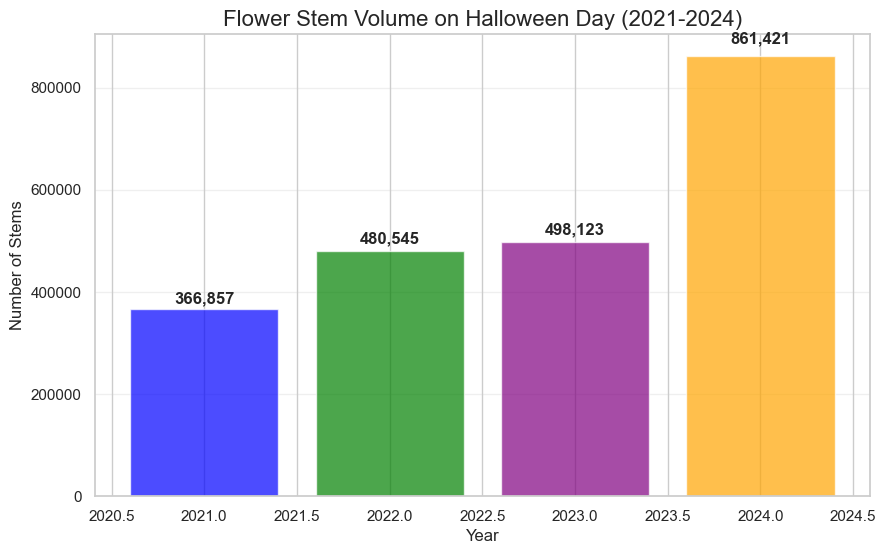

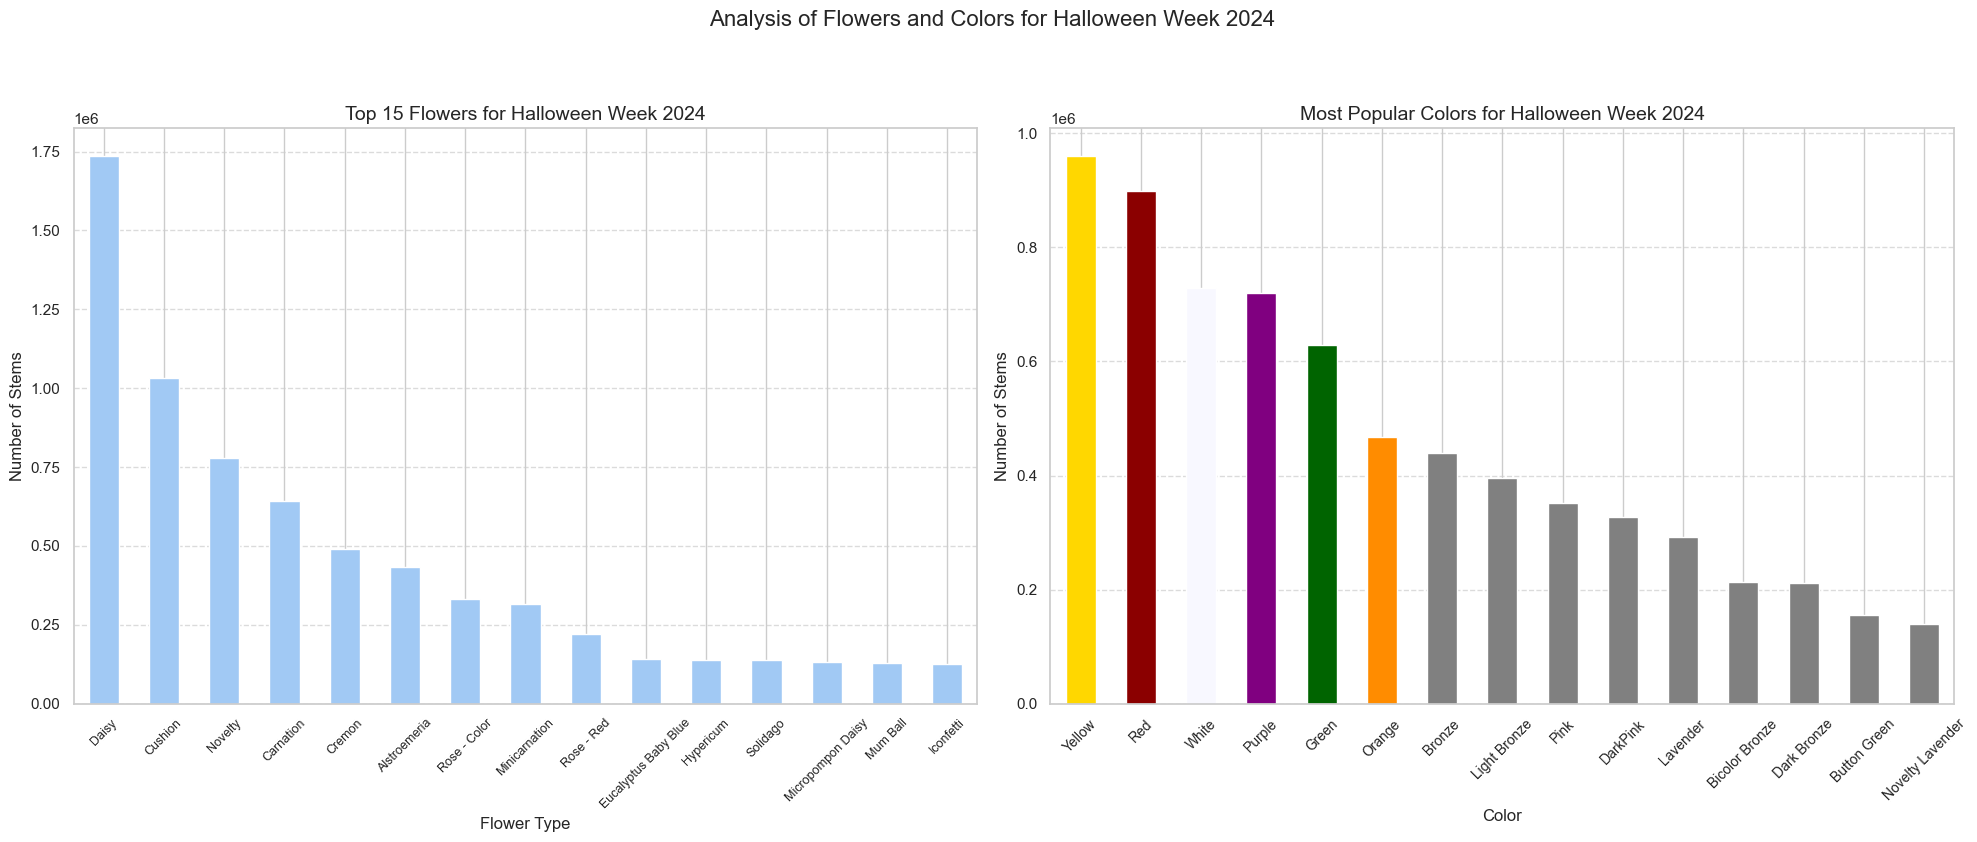

Halloween Week 2024 Summary:
Total stem volume: 8,084,211
Top flower: Daisy (1,736,635 stems)
Top color: Yellow (960,826 stems)


In [30]:
# Analyze Halloween flower stem volume from 2021 to 2024

# Filter data for the period around Halloween (October 1 to October 31)
halloween_periods = {}
for year in range(2021, 2025):
    if year in df['Year'].values:  # Check if year exists in the dataset
        halloween_periods[year] = df[(df['Year'] == year) & (df['Month'] == 10)]

# Group by date and sum the stems for each year's Halloween period
halloween_daily_stems = {}
for year, data in halloween_periods.items():
    if not data.empty and 'Stems' in data.columns:
        daily = data.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
        daily['date'] = pd.to_datetime(f'{year}-' + 
                                       daily['Month'].astype(str).str.zfill(2) + '-' + 
                                       daily['Day'].astype(str).str.zfill(2))
        halloween_daily_stems[year] = daily

# Create a plot to compare Halloween stem volumes across years
plt.figure(figsize=(16, 10))

colors = {2021: 'blue', 2022: 'green', 2023: 'purple', 2024: 'orange'}
markers = {2021: 'o', 2022: 's', 2023: '^', 2024: 'd'}

for year, data in halloween_daily_stems.items():
    if not data.empty:
        plt.plot(data['Day'], data['Stems'],
                 marker=markers[year], linestyle='-', color=colors[year],
                 alpha=0.8, linewidth=2, label=f'{year}')
        
        # Mark Halloween Day
        halloween_day = data[data['Day'] == 31]
        if not halloween_day.empty:
            plt.plot(31, halloween_day['Stems'].values[0],
                     marker='*', markersize=15, color=colors[year],
                     markeredgecolor='black', markeredgewidth=1.5)

# Add labels and formatting
plt.xlabel('Day of October', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.title('Daily Flower Stem Volume in October Leading Up to Halloween (2021-2024)', fontsize=18)
plt.grid(alpha=0.3)
plt.axvline(x=31, color='black', linestyle='--', alpha=0.5, label='Halloween')
plt.legend()

# Set x-axis ticks to show all days of October
plt.xticks(range(1, 32))

# Find and annotate peak days for each year
for year, data in halloween_daily_stems.items():
    if not data.empty:
        peak_row = data.loc[data['Stems'].idxmax()]
        peak_stems = peak_row['Stems']
        peak_day = peak_row['Day']

        plt.annotate(f"{year} Peak: {peak_stems:,}\n(Oct {peak_day})",
                     xy=(peak_day, peak_stems), xycoords='data',
                     xytext=(peak_day-2, peak_stems + peak_stems*0.1),
                     textcoords='data',
                     arrowprops=dict(facecolor=colors[year], shrink=0.05, width=1.5, headwidth=7))

plt.show()

# Create a bar chart comparing Halloween Day stem volumes across years
plt.figure(figsize=(10, 6))
halloween_stems = []
years_with_data = []

for year, period_data in halloween_periods.items():
    if not period_data.empty and 'Stems' in period_data.columns:
        halloween_stem_count = period_data[period_data['Day'] == 31]['Stems'].sum()
        if halloween_stem_count > 0:
            halloween_stems.append(halloween_stem_count)
            years_with_data.append(year)

if years_with_data:
    bars = plt.bar(years_with_data, halloween_stems,
                   color=[colors[y] for y in years_with_data], alpha=0.7)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.03,
                 f'{int(height):,}', ha='center', fontweight='bold')

    plt.title("Flower Stem Volume on Halloween Day (2021-2024)", fontsize=16)
    plt.ylabel('Number of Stems')
    plt.xlabel('Year')
    plt.grid(alpha=0.3, axis='y')
    plt.show()

# Analyze popular flowers and colors for Halloween in the most recent year with data
latest_year = max([y for y in halloween_periods.keys() if not halloween_periods[y].empty], default=None)

if latest_year:
    halloween_data = halloween_periods[latest_year]
    required_columns = ['Month', 'Day', 'Stems', 'Flower', 'Color']
    
    if all(col in halloween_data.columns for col in required_columns):
        # Get data for the week leading up to Halloween
        halloween_week_data = halloween_data[(halloween_data['Day'] >= 24) & (halloween_data['Day'] <= 31)]

        if not halloween_week_data.empty:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
            
            # Top flowers
            stems_by_flower_halloween = halloween_week_data.groupby('Flower')['Stems'].sum().sort_values(ascending=False).head(15)
            stems_by_flower_halloween.plot(kind='bar', ax=ax1)
            ax1.set_title(f"Top 15 Flowers for Halloween Week {latest_year}", fontsize=14)
            ax1.set_ylabel("Number of Stems")
            ax1.set_xlabel("Flower Type")
            ax1.tick_params(axis='x', rotation=45, labelsize=9)
            ax1.grid(axis='y', linestyle='--', alpha=0.7)

            # Top colors
            stems_by_color_halloween = halloween_week_data.groupby('Color')['Stems'].sum().sort_values(ascending=False).head(15)
            
            color_mapping = {
                'Black': 'black',
                'Purple': 'purple',
                'Green': 'darkgreen',
                'White': 'ghostwhite',
                'Red': 'darkred',
                'Orange': 'darkorange',
                'Yellow': 'gold'
            }
            
            bar_colors = [color_mapping.get(color, 'gray') for color in stems_by_color_halloween.index]
            
            stems_by_color_halloween.plot(kind='bar', color=bar_colors, ax=ax2)
            ax2.set_title(f"Most Popular Colors for Halloween Week {latest_year}", fontsize=14)
            ax2.set_ylabel("Number of Stems")
            ax2.set_xlabel("Color")
            ax2.tick_params(axis='x', rotation=45, labelsize=10)
            ax2.grid(axis='y', linestyle='--', alpha=0.7)

            plt.suptitle(f"Analysis of Flowers and Colors for Halloween Week {latest_year}", fontsize=16, y=1.05)
            plt.tight_layout()
            plt.show()

            # Print summary statistics
            print(f"Halloween Week {latest_year} Summary:")
            print(f"Total stem volume: {halloween_week_data['Stems'].sum():,}")
            print(f"Top flower: {stems_by_flower_halloween.index[0]} ({stems_by_flower_halloween.iloc[0]:,} stems)")
            print(f"Top color: {stems_by_color_halloween.index[0]} ({stems_by_color_halloween.iloc[0]:,} stems)")


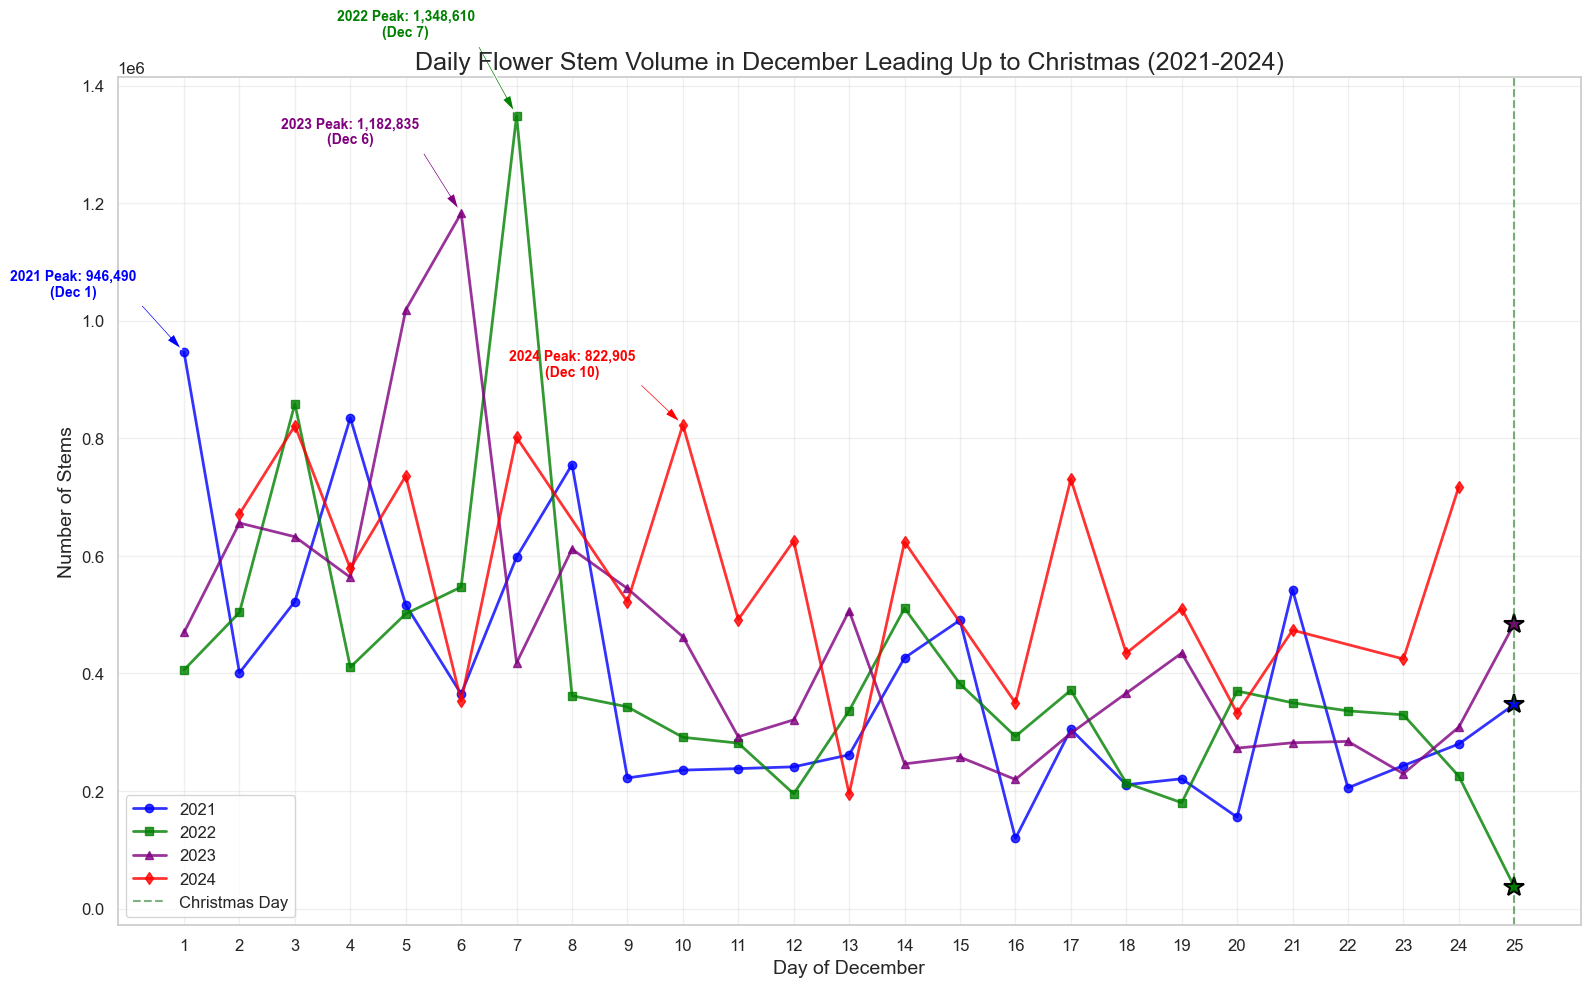

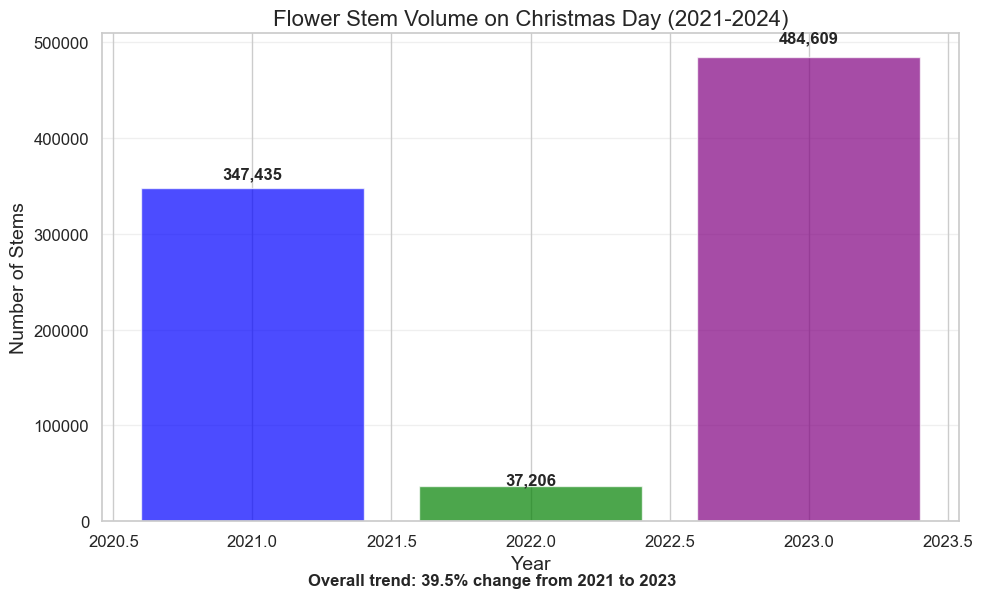

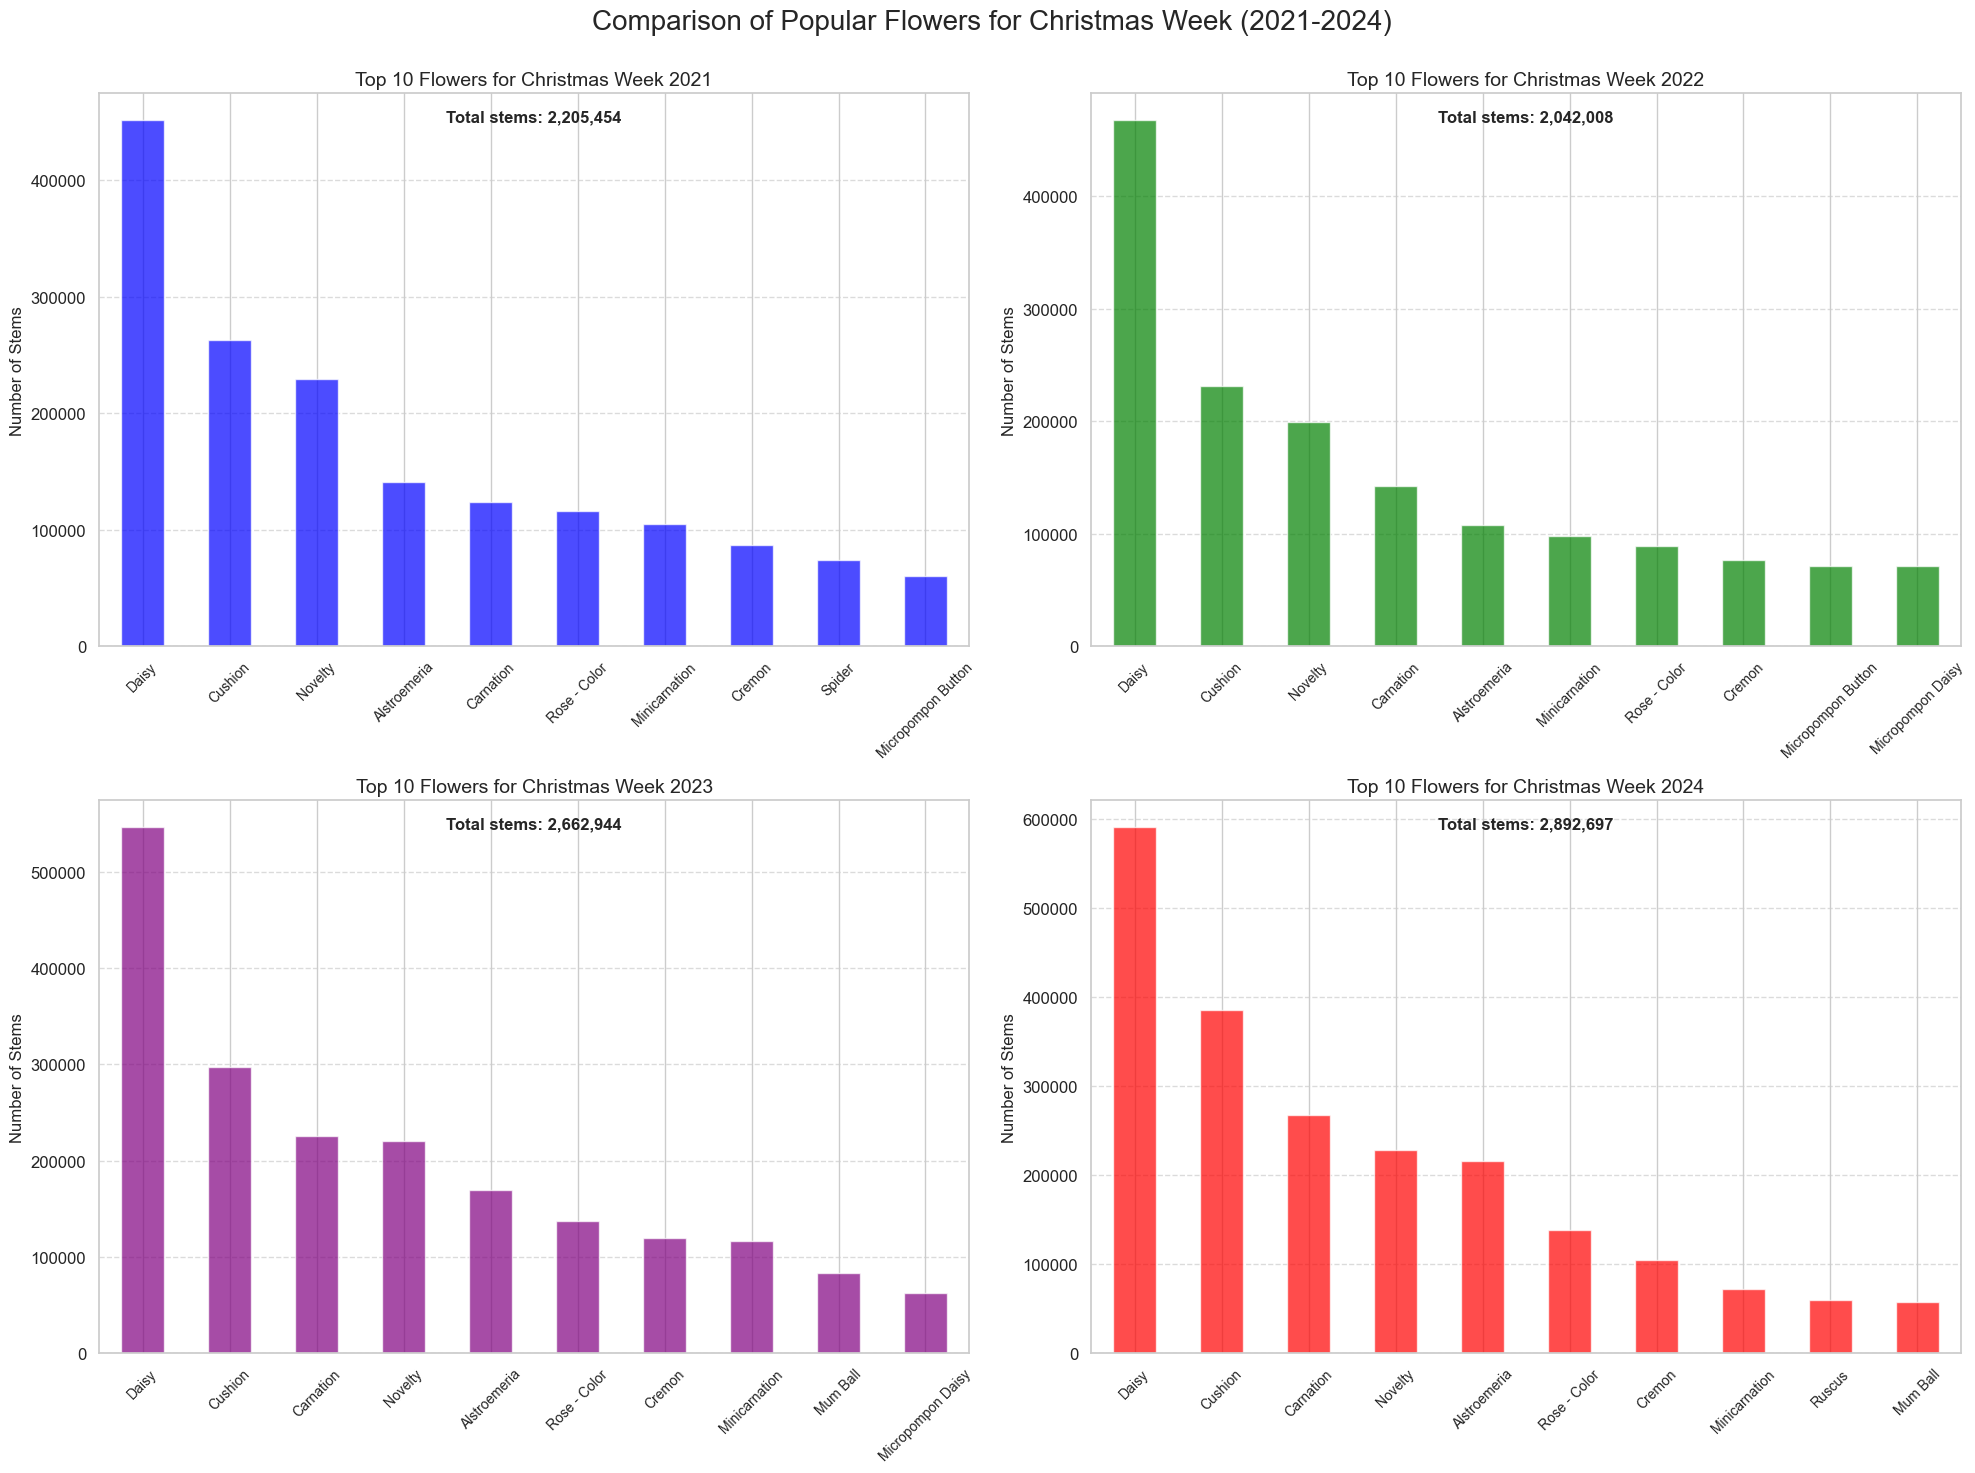

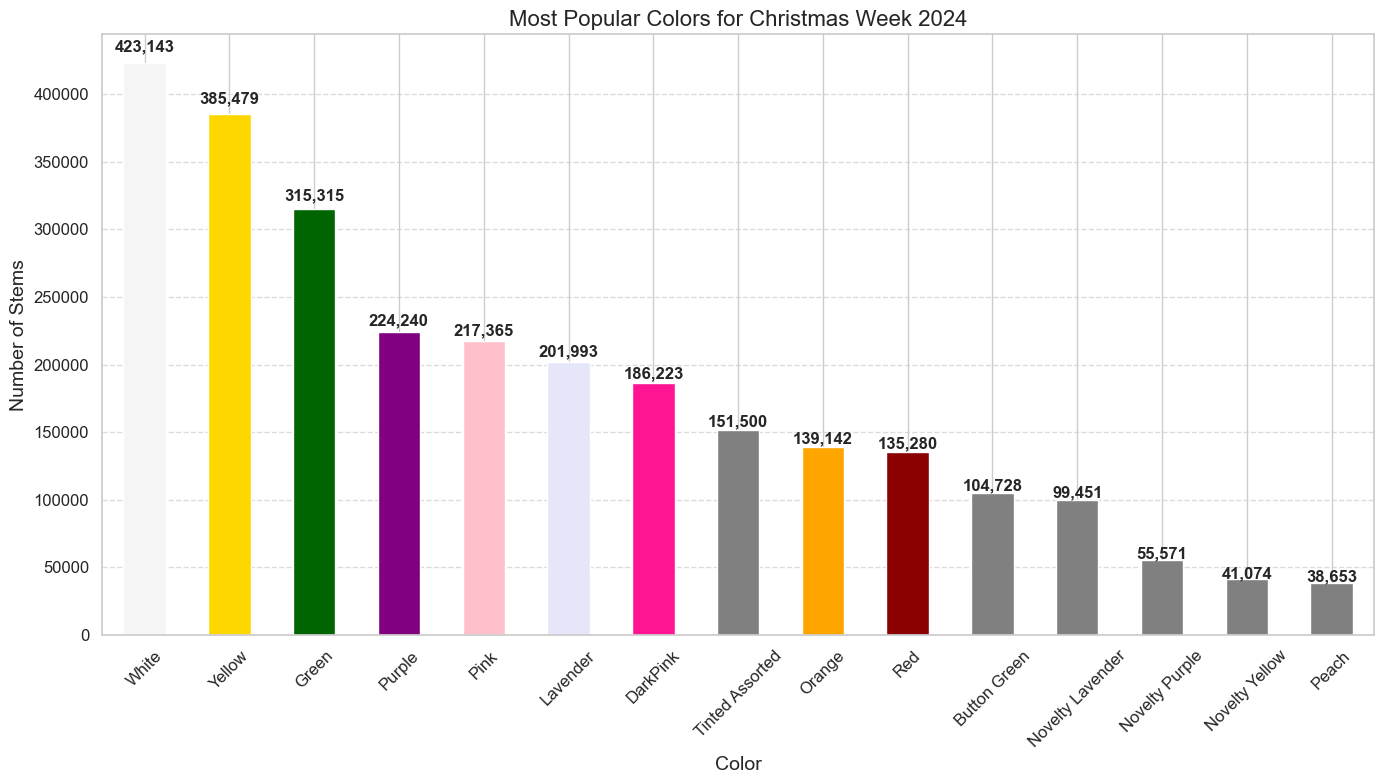

In [48]:
# --- Analyzing and comparing Christmas period flower stem volumes (2021-2024) ---

# Define date ranges for Christmas periods (December 1-25 each year)
christmas_periods = {}
for year in range(2021, 2025):
    christmas_periods[year] = df[(df['Year'] == year) & 
                               (df['Month'] == 12) & 
                               (df['Day'] <= 25)]

# Group by date and sum the stems for each year
christmas_daily_stems = {}
for year, data in christmas_periods.items():
    if not data.empty:
        daily = data.groupby(['Month', 'Day'])['Stems'].sum().reset_index()
        daily['date'] = pd.to_datetime(f'{year}-' + 
                                     daily['Month'].astype(str).str.zfill(2) + '-' + 
                                     daily['Day'].astype(str).str.zfill(2))
        christmas_daily_stems[year] = daily.sort_values('date')

# Create a plot to compare Christmas stem volumes across years
plt.figure(figsize=(16, 10))

colors = {2021: 'blue', 2022: 'green', 2023: 'purple', 2024: 'red'}
markers = {2021: 'o', 2022: 's', 2023: '^', 2024: 'd'}

for year, data in christmas_daily_stems.items():
    if not data.empty:
        plt.plot(data['Day'], data['Stems'],
                marker=markers[year], linestyle='-', color=colors[year],
                alpha=0.8, linewidth=2, label=f'{year}')
        
        # Mark Christmas Day
        christmas_day = data[data['Day'] == 25]
        if not christmas_day.empty:
            plt.plot(25, christmas_day['Stems'].values[0],
                    marker='*', markersize=15, color=colors[year],
                    markeredgecolor='black', markeredgewidth=1.5)

# Add labels and formatting
plt.xlabel('Day of December', fontsize=14)
plt.ylabel('Number of Stems', fontsize=14)
plt.title('Daily Flower Stem Volume in December Leading Up to Christmas (2021-2024)', fontsize=18)
plt.grid(alpha=0.3)
plt.axvline(x=25, color='darkgreen', linestyle='--', alpha=0.5, label='Christmas Day')
plt.legend(fontsize=12)

# Set x-axis ticks to show all days of December
plt.xticks(range(1, 26))

# Find and annotate peak days for each year
for year, data in christmas_daily_stems.items():
    if not data.empty:
        peak_row = data.loc[data['Stems'].idxmax()]
        peak_stems = peak_row['Stems']
        peak_day = peak_row['Day']

        plt.annotate(f"{year} Peak: {peak_stems:,}\n(Dec {peak_day})",
                    xy=(peak_day, peak_stems), xycoords='data',
                    xytext=(peak_day-2, peak_stems + peak_stems*0.1),
                    textcoords='data',
                    arrowprops=dict(facecolor=colors[year], shrink=0.05, width=1.5, headwidth=7),
                    ha='center', fontweight='bold', fontsize=10, color=colors[year])

plt.tight_layout()
plt.show()

# Create a bar chart comparing Christmas Day stem volumes across years
plt.figure(figsize=(10, 6))
christmas_stems = []
years_with_data = []

for year, period_data in christmas_periods.items():
    if not period_data.empty:
        christmas_stem_count = period_data[period_data['Day'] == 25]['Stems'].sum()
        if christmas_stem_count > 0:
            christmas_stems.append(christmas_stem_count)
            years_with_data.append(year)

if years_with_data:
    bars = plt.bar(years_with_data, christmas_stems,
                color=[colors[y] for y in years_with_data], alpha=0.7)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.03,
                f'{int(height):,}', ha='center', fontweight='bold')

    plt.title("Flower Stem Volume on Christmas Day (2021-2024)", fontsize=16)
    plt.ylabel('Number of Stems', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.grid(alpha=0.3, axis='y')
    
    # Calculate and display trend percentage changes
    if len(christmas_stems) > 1:
        overall_change = ((christmas_stems[-1] - christmas_stems[0]) / christmas_stems[0]) * 100
        plt.figtext(0.5, 0.01, f"Overall trend: {overall_change:.1f}% change from 2021 to {years_with_data[-1]}",
                  ha='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Compare flower types and colors for the week leading to Christmas across years
latest_year = max([y for y in christmas_periods.keys() if not christmas_periods[y].empty])

if latest_year:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle(f"Comparison of Popular Flowers for Christmas Week (2021-2024)", 
                fontsize=20, y=0.95)
    
    # Loop through available years and create subplots
    for i, year in enumerate([2021, 2022, 2023, 2024]):
        if year in christmas_periods and not christmas_periods[year].empty:
            row, col = divmod(i, 2)
            ax = axes[row, col]
            
            # Get data for the week leading up to Christmas
            christmas_week_data = christmas_periods[year][(christmas_periods[year]['Day'] >= 18) & 
                                                        (christmas_periods[year]['Day'] <= 25)]
            
            if not christmas_week_data.empty:
                # Top 10 flowers
                stems_by_flower = christmas_week_data.groupby('Flower')['Stems'].sum().sort_values(ascending=False).head(10)
                stems_by_flower.plot(kind='bar', ax=ax, color=colors[year], alpha=0.7)
                
                ax.set_title(f"Top 10 Flowers for Christmas Week {year}", fontsize=14)
                ax.set_ylabel("Number of Stems", fontsize=12)
                ax.set_xlabel("", fontsize=12)
                ax.tick_params(axis='x', rotation=45, labelsize=10)
                ax.grid(axis='y', linestyle='--', alpha=0.7)
                
                # Add total stem count
                total_stems = christmas_week_data['Stems'].sum()
                ax.text(0.5, 0.95, f"Total stems: {total_stems:,}", 
                        transform=ax.transAxes, ha='center', fontweight='bold')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Create color comparison chart for latest year
    plt.figure(figsize=(14, 8))
    
    # Get Christmas week data for the latest year
    christmas_week_latest = christmas_periods[latest_year][
        (christmas_periods[latest_year]['Day'] >= 18) & 
        (christmas_periods[latest_year]['Day'] <= 25)
    ]
    
    # Get top colors
    stems_by_color_christmas = christmas_week_latest.groupby('Color')['Stems'].sum().sort_values(ascending=False).head(15)
    
    # Create a custom colormap for the colors (attempt to match actual colors where possible)
    color_mapping = {
        'Red': 'darkred',
        'Green': 'darkgreen',
        'White': 'whitesmoke',
        'Yellow': 'gold',
        'Pink': 'pink',
        'Purple': 'purple',
        'Lavender': 'lavender',
        'DarkPink': 'deeppink',
        'Orange': 'orange',
        'Burgundy': 'maroon'
    }
    
    bar_colors = [color_mapping.get(color, 'gray') for color in stems_by_color_christmas.index]
    
    # Create the color bar chart
    stems_by_color_christmas.plot(kind='bar', color=bar_colors, figsize=(14, 8))
    plt.title(f"Most Popular Colors for Christmas Week {latest_year}", fontsize=16)
    plt.ylabel("Number of Stems", fontsize=14)
    plt.xlabel("Color", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for i, v in enumerate(stems_by_color_christmas):
        plt.text(i, v + v*0.02, f'{int(v):,}', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()